<a href="https://colab.research.google.com/github/ThamaraCrispim/python-data-analysis-portfolio/blob/main/analise_acidentes_prf_2025_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A Polícia Rodoviária Federal (PRF) é responsável pela fiscalização e segurança de aproximadamente 70 mil quilômetros de rodovias federais em todo o território nacional. Os acidentes de trânsito registrados nessas vias representam um importante problema de segurança pública, com impactos diretos na vida dos cidadãos, na mobilidade e nos serviços de emergência.

Diante disso, torna-se essencial compreender onde, quando e em quais condições os acidentes mais graves ocorrem, a fim de apoiar ações preventivas, melhorias na infraestrutura viária e estratégias de fiscalização mais eficientes.

Fonte: Polícia Rodoviária Federal

https://www.gov.br/prf/pt-br/acesso-a-informacao/dados-abertos/dados-abertos-da-prf



Pergunta de negócio principal:Quais estados e períodos do tempo concentram o maior número de acidentes graves e fatais nas rodovias federais brasileiras em 2025?


In [ ]:
#bibliotecas
import pandas as pd
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import numpy as np



In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Pod Academy/Dados/datatran2025.csv',delimiter=';',
                            encoding='ISO-8859-1')

In [ ]:
df.shape

(72476, 30)

A partir da inspeção inicial do conjunto de dados por meio do método df.shape, observa-se que o banco de dados de acidentes da PRF referente ao ano de 2025, agrupado por ocorrência, é composto por 72.476 registros, representando ocorrências individuais de acidentes, e 30 variáveis, que descrevem características relacionadas ao local, ao tempo, às condições do acidente e aos envolvidos.

Abaixo vamos encontra a descrição dos dados:

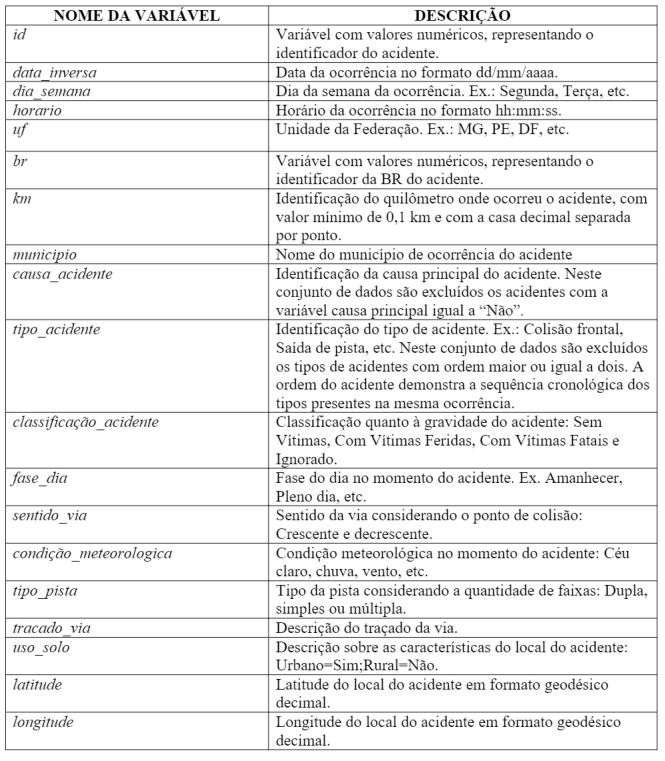

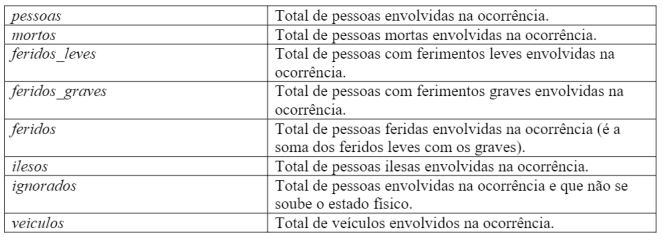

# **2. Momento de Exploração dos Dados**

In [ ]:
# verificando o tipo dos dados
df.dtypes


,0
id,int64
data_inversa,object
dia_semana,object
horario,object
uf,object
br,int64
km,object
municipio,object
causa_acidente,object
tipo_acidente,object


**Análise dos Tipos de Variáveis**

A inspeção dos tipos de dados indica que o conjunto de dados apresenta uma combinação de variáveis numéricas e categóricas, permitindo análises quantitativas e qualitativas dos acidentes de trânsito. As variáveis numéricas estão majoritariamente relacionadas à quantidade de pessoas, veículos e vítimas envolvidas, enquanto as variáveis categóricas descrevem características temporais, geográficas e operacionais das ocorrências.

Observa-se, entretanto, que algumas variáveis temporais e espaciais encontram-se armazenadas como texto (object), como data_inversa, horario, km, latitude e longitude, indicando a necessidade de tratamento e conversão de tipos antes da realização de análises mais avançadas.

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
# CONVERSÃO E TRATAMENTO DE TIPOS DE DADOS

#1. Conversão de data
df['data_inversa'] = pd.to_datetime(
    df['data_inversa'],
    errors='coerce'
)

# Criar variáveis temporais auxiliares
df['ano'] = df['data_inversa'].dt.year
df['mes'] = df['data_inversa'].dt.month
df['dia'] = df['data_inversa'].dt.day

# 2. Conversão de horário

df['horario'] = pd.to_datetime(
    df['horario'],
    format='%H:%M:%S',
    errors='coerce'
)

# Extrair hora
df['hora'] = df['horario'].dt.hour

# Criar faixas de horário
bins = [0, 6, 12, 18, 24]
labels = ['Madrugada', 'Manhã', 'Tarde', 'Noite']

df['faixa_horaria'] = pd.cut(
    df['hora'],
    bins=bins,
    labels=labels,
    right=False
)

# 3. Conversão de variáveis numéricas

df['km'] = pd.to_numeric(df['km'], errors='coerce')
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72476 entries, 0 to 72475
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      72476 non-null  int64         
 1   data_inversa            72476 non-null  datetime64[ns]
 2   dia_semana              72476 non-null  object        
 3   horario                 72476 non-null  datetime64[ns]
 4   uf                      72476 non-null  object        
 5   br                      72476 non-null  int64         
 6   km                      45814 non-null  float64       
 7   municipio               72476 non-null  object        
 8   causa_acidente          72476 non-null  object        
 9   tipo_acidente           72476 non-null  object        
 10  classificacao_acidente  72475 non-null  object        
 11  fase_dia                72476 non-null  object        
 12  sentido_via             72476 non-null  object

In [ ]:
def generate_metadata(dataframe):
    """
    Gera um DataFrame de metadados do DataFrame de acidentes da PRF.
    """

    metadata = pd.DataFrame({
        'nome_variavel': dataframe.columns,
        'tipo_dado': dataframe.dtypes.astype(str),
        'qt_nulos': dataframe.isnull().sum(),
        'percent_nulos': round((dataframe.isnull().sum() / len(dataframe)) * 100, 2),
        'cardinalidade': dataframe.nunique(dropna=True)
    })

    # Ordenação apenas para leitura (não analítica)
    metadata = metadata.sort_values(
        by=['percent_nulos', 'cardinalidade'],
        ascending=[False, True]
    ).reset_index(drop=True)

    return metadata


# Aplicação
metadata_df = generate_metadata(df)
metadata_df


,nome_variavel,tipo_dado,qt_nulos,percent_nulos,cardinalidade
0,latitude,float64,72438,99.95,15
1,longitude,float64,72431,99.94,22
2,km,float64,26662,36.79,1102
3,uop,object,40,0.06,395
4,delegacia,object,24,0.03,153
5,regional,object,4,0.01,28
6,ano,int32,0,0.00,1
7,uso_solo,object,0,0.00,2
8,classificacao_acidente,object,1,0.00,3
9,sentido_via,object,0,0.00,3


**Qualidade dos dados e decisões analíticas**

Antes de explorar padrões e relações no conjunto de dados, foi realizada uma análise crítica da qualidade das variáveis, com foco na completude e na utilidade analítica de cada uma. De forma geral, o banco de dados apresenta bom nível de preenchimento, o que permite análises exploratórias consistentes e interpretáveis.

Algumas variáveis, no entanto, apresentaram limitações importantes. As colunas latitude e longitude, apesar de serem naturalmente relevantes para análises espaciais, possuem cerca de 99% de valores nulos. Essa limitação inviabiliza qualquer interpretação geográfica confiável, motivo pelo qual essas variáveis foram excluídas das análises subsequentes.

A variável km apresenta ausência parcial de dados, mas não em nível crítico. Por esse motivo, optou-se por mantê-la no conjunto de dados, utilizando-a com cautela e evitando análises que dependam exclusivamente dessa informação.

As demais variáveis, principalmente aquelas relacionadas ao tempo, ao tipo de acidente e à gravidade dos eventos, demonstraram alta completude e cardinalidades compatíveis com o contexto do estudo. Essas características indicam alto potencial analítico e sustentam sua utilização nas etapas seguintes da análise.

Essa etapa foi essencial para garantir que as análises realizadas fossem baseadas em dados consistentes e para tornar explícitas as decisões metodológicas adotadas ao longo do projeto.

# **3. Limpeza e Transformação dos Dados**

In [ ]:
df['classificacao_acidente'].unique()

array(['Com Vítimas Feridas', nan, 'Com Vítimas Fatais', 'Sem Vítimas'],
      dtype=object)

In [ ]:
display(df[df['classificacao_acidente'].isna()])



,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,latitude,longitude,regional,delegacia,uop,ano,mes,dia,hora,faixa_horaria
1,652519,2025-01-01,quarta-feira,1900-01-01 07:50:00,CE,116,NaN,PENAFORTE,Pista esburacada,Colisão frontal,...,NaN,NaN,SPRF-CE,DEL05-CE,UOP03-DEL05-CE,2025,1,1,7,Manhã


In [ ]:
df[['classificacao_acidente', 'mortos']].drop_duplicates()

,classificacao_acidente,mortos
0,Com Vítimas Feridas,0
1,NaN,1
5,Com Vítimas Fatais,2
8,Com Vítimas Fatais,1
9,Sem Vítimas,0
43,Com Vítimas Fatais,5
396,Com Vítimas Fatais,3
1182,Com Vítimas Fatais,6
4217,Com Vítimas Fatais,4
7327,Com Vítimas Fatais,9


In [ ]:
# Fazendo a alteração dos dois valores NoN para 'Sem Vítimas'
df.loc[(df['classificacao_acidente'].isna()) & (df['mortos'] == 0), 'classificacao_acidente'] = 'Sem Vítimas'

In [ ]:
# Conferindo alteração
df[df['classificacao_acidente'].isna()]

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,latitude,longitude,regional,delegacia,uop,ano,mes,dia,hora,faixa_horaria
1,652519,2025-01-01,quarta-feira,1900-01-01 07:50:00,CE,116,NaN,PENAFORTE,Pista esburacada,Colisão frontal,...,NaN,NaN,SPRF-CE,DEL05-CE,UOP03-DEL05-CE,2025,1,1,7,Manhã


In [ ]:
display(df)

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,latitude,longitude,regional,delegacia,uop,ano,mes,dia,hora,faixa_horaria
0,652493,2025-01-01,quarta-feira,1900-01-01 06:20:00,SP,116,225.0,GUARULHOS,Reação tardia ou ineficiente do condutor,Tombamento,...,NaN,NaN,SPRF-SP,DEL01-SP,UOP01-DEL01-SP,2025,1,1,6,Manhã
1,652519,2025-01-01,quarta-feira,1900-01-01 07:50:00,CE,116,NaN,PENAFORTE,Pista esburacada,Colisão frontal,...,NaN,NaN,SPRF-CE,DEL05-CE,UOP03-DEL05-CE,2025,1,1,7,Manhã
2,652522,2025-01-01,quarta-feira,1900-01-01 08:45:00,PR,369,NaN,CORNELIO PROCOPIO,Reação tardia ou ineficiente do condutor,Colisão traseira,...,NaN,NaN,SPRF-PR,DEL07-PR,UOP05-DEL07-PR,2025,1,1,8,Manhã
3,652544,2025-01-01,quarta-feira,1900-01-01 11:00:00,PR,116,74.0,CAMPINA GRANDE DO SUL,Reação tardia ou ineficiente do condutor,Saída de leito carroçável,...,NaN,NaN,SPRF-PR,DEL01-PR,UOP02-DEL01-PR,2025,1,1,11,Manhã
4,652549,2025-01-01,quarta-feira,1900-01-01 09:30:00,MG,251,471.0,FRANCISCO SA,Velocidade Incompatível,Colisão frontal,...,NaN,NaN,SPRF-MG,DEL12-MG,UOP01-DEL12-MG,2025,1,1,9,Manhã
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72471,747145,2025-12-19,sexta-feira,1900-01-01 18:56:00,SE,235,NaN,LARANJEIRAS,Ultrapassagem Indevida,Colisão lateral mesmo sentido,...,NaN,NaN,SPRF-SE,DEL01-SE,UOP02-DEL01-SE,2025,12,19,18,Noite
72472,747150,2025-12-10,quarta-feira,1900-01-01 12:40:00,RJ,116,182.0,RIO DE JANEIRO,Condutor deixou de manter distância do veículo...,Colisão traseira,...,NaN,NaN,SPRF-RJ,DEL06-RJ,UOP01-DEL06-RJ,2025,12,10,12,Tarde
72473,747182,2025-12-24,quarta-feira,1900-01-01 21:45:00,PR,277,NaN,VIRMOND,Reação tardia ou ineficiente do condutor,Queda de ocupante de veículo,...,NaN,NaN,SPRF-PR,DEL04-PR,UOP02-DEL04-PR,2025,12,24,21,Noite
72474,747189,2025-12-21,domingo,1900-01-01 01:10:00,PR,277,NaN,LARANJEIRAS DO SUL,Ausência de reação do condutor,Saída de leito carroçável,...,NaN,NaN,SPRF-PR,DEL04-PR,UOP02-DEL04-PR,2025,12,21,1,Madrugada


# **3.2 Transformação dos tipos de dados das colunas**

In [ ]:
# Transformando as colunas de horário e data_inversa em datetime
df['horario'] = pd.to_datetime(df['horario'], format='%H:%M:%S', errors='coerce')
df['data_inversa'] = pd.to_datetime(df['data_inversa'], format='%Y-%m-%d', errors='coerce')

# Verificando a transformação
df[['horario', 'data_inversa']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72476 entries, 0 to 72475
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   horario       72476 non-null  datetime64[ns]
 1   data_inversa  72476 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 1.1 MB


In [ ]:
df['latitude'] = df['latitude'].replace('NaN', np.nan).astype(float)
df['longitude'] = df['longitude'].replace('NaN', np.nan).astype(float)

In [ ]:
# Vamos verificar quantos registros estão sem coordenadas nas duas variáveis
sem_coordenadas = df[df['latitude'].isna() & df['longitude'].isna()]
print(f'Registros sem coordenadas: {sem_coordenadas.shape[0]} de {df.shape[0]}')

Registros sem coordenadas: 72423 de 72476


Durante a etapa de preparação dos dados, foram realizadas transformações estruturais com o objetivo de padronizar formatos, corrigir inconsistências e viabilizar análises mais robustas e confiáveis.

Foram aplicadas as seguintes transformações:

Coluna data_inversa: originalmente armazenada como texto (object), foi convertida para o tipo datetime. Essa conversão permitiu a realização de análises temporais mais detalhadas, como extração de ano, mês, dia da semana e comparações entre períodos.

Coluna horario: convertida de object para o tipo datetime.time, possibilitando análises relacionadas à distribuição dos acidentes ao longo do dia, como segmentação por faixas horárias (manhã, tarde, noite e madrugada).

Colunas latitude e longitude: inicialmente registradas como texto, apresentavam inconsistências no formato numérico (uso de vírgula como separador decimal). Foi realizada a padronização, substituindo vírgulas por pontos e convertendo ambas para o tipo float, permitindo seu uso em análises geográficas e futuras visualizações em mapas.

Análise de Valores Ausentes nas Coordenadas Geográficas

Foi identificada uma quantidade expressiva de registros sem informações de localização geográfica:

Total de registros no dataset: 72.476

Registros sem coordenadas válidas: 72.423

Esse resultado indica que aproximadamente 99,9% dos registros não possuem valores válidos de latitude e longitude.

Além disso, observou-se que sempre que a coluna latitude está ausente, a coluna longitude também se encontra ausente, e vice-versa. Isso demonstra que a ausência dessas informações ocorre de forma conjunta e consistente, sugerindo que esses dados não foram registrados na base original da PRF.

Implicação Analítica:
Devido a essa grande quantidade de valores ausentes, análises espaciais ou georreferenciadas ficam inviabilizadas neste conjunto de dados, sendo necessário recorrer a outras fontes complementares caso se deseje realizar estudos geográficos mais detalhados.


# **3.3 - Criação de Variáveis Derivadas**

In [ ]:
#Criação da Variável de 'Mês' para Análises Futuras
meses = {1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril', 5: 'Maio', 6: 'Junho',
         7: 'Julho', 8: 'Agosto', 9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'}

df['nome_mes'] = df['data_inversa'].dt.month.map(meses)

# Conferindo a criação da variável
df['nome_mes'].unique()

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [ ]:
#Criação da Variável de 'Turno' para Análises Futuras
def definir_turno(hora: datetime) -> str:
    if (hora >= 6) & (hora < 12):
        return 'Manhã'
    if (hora >= 12) & (hora < 18):
        return 'Tarde'
    if (hora >= 18) & (hora < 24):
        return 'Noite'
    else:
        return 'Madrugada'

df['turno'] = df['horario'].dt.hour.apply(definir_turno)

# Conferindo a criação da variável
df[['horario', 'turno']].head(10)

,horario,turno
0,1900-01-01 06:20:00,Manhã
1,1900-01-01 07:50:00,Manhã
2,1900-01-01 08:45:00,Manhã
3,1900-01-01 11:00:00,Manhã
4,1900-01-01 09:30:00,Manhã
5,1900-01-01 10:40:00,Manhã
6,1900-01-01 12:23:00,Tarde
7,1900-01-01 17:45:00,Tarde
8,1900-01-01 18:40:00,Noite
9,1900-01-01 17:00:00,Tarde


# **4. Análise Descritiva**

In [ ]:
acidentes_por_dia = (
    df
    .groupby('dia_semana')
    .size()
    .sort_values(ascending=False)
    .head(10)
    .reset_index(name='quantidade')
)

acidentes_por_dia

,dia_semana,quantidade
0,sábado,11545
1,domingo,11463
2,sexta-feira,11185
3,segunda-feira,10276
4,quarta-feira,9550
5,quinta-feira,9399
6,terça-feira,9058


Ao analisarmos a distribuição de frequência dos acidentes por dia da semana, observa-se uma sazonalidade clara. Existe uma tendência de aumento progressivo das ocorrências a partir de sexta-feira, atingindo o pico máximo aos sábados e domingos. Esse padrão sugere que o deslocamento para lazer e viagens de fim de semana impacta significativamente o volume de sinistros nas rodovias federais, superando os dias úteis comerciais

In [ ]:
df.describe()

,id,data_inversa,horario,br,km,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,ano,mes,dia,hora
count,72476.000000,72476,72476,72476.000000,45814.000000,72476.000000,72476.000000,72476.000000,72476.000000,72476.000000,72476.000000,72476.000000,72476.000000,38.000000,45.000000,72476.0,72476.000000,72476.000000,72476.000000
mean,700795.698728,2025-07-06 13:18:50.327280640,1900-01-01 13:17:46.334510848,208.490052,263.676278,2.596556,0.083338,0.875987,0.275981,1.053383,0.394558,1.151968,1.998234,-16.684211,-47.377778,2025.0,6.675865,15.722487,12.893192
min,652468.000000,2025-01-01 00:00:00,1900-01-01 00:00:00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-29.000000,-60.000000,2025.0,1.000000,1.000000,0.000000
25%,672781.750000,2025-04-08 00:00:00,1900-01-01 08:15:00,101.000000,83.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-20.000000,-51.000000,2025.0,4.000000,8.000000,8.000000
50%,703833.500000,2025-07-08 00:00:00,1900-01-01 14:00:00,155.000000,197.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000,-17.500000,-47.000000,2025.0,7.000000,16.000000,14.000000
75%,723662.250000,2025-10-06 00:00:00,1900-01-01 18:20:00,319.000000,408.000000,3.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000,-12.250000,-43.000000,2025.0,10.000000,23.000000,18.000000
max,747277.000000,2025-12-31 00:00:00,1900-01-01 23:59:00,495.000000,1257.000000,76.000000,16.000000,41.000000,22.000000,71.000000,81.000000,49.000000,82.000000,-1.000000,-35.000000,2025.0,12.000000,31.000000,23.000000
std,26905.479194,NaN,NaN,128.569261,229.141131,2.251565,0.338750,1.037559,0.610767,1.830855,0.860407,1.143117,1.126383,6.940306,6.675222,0.0,3.437005,8.736337,6.026809


**Análise do df.describe**

A análise descritiva indica que a maioria dos acidentes em 2025 apresentou baixa complexidade. A variável pessoas mostra que 75% das ocorrências envolveram no máximo duas pessoas, evidenciando que eventos com muitos envolvidos são exceções. O mesmo padrão é observado para veículos envolvidos, onde a maior parte dos acidentes ocorreu com até dois veículos.

Na variável mortos, observa-se que em pelo menos 75% dos acidentes não houve vítimas fatais, reforçando que a maior parte das ocorrências teve menor gravidade. Entretanto, valores máximos elevados revelam a existência de eventos raros e severos, responsáveis por concentrar grande parte dos óbitos.

Os feridos leves aparecem com maior frequência, enquanto os feridos graves ocorrem em menor proporção, indicando que a maioria das lesões registradas possui menor severidade. A variável ilesos confirma que, mesmo em acidentes com vários envolvidos, parte das pessoas sai sem ferimentos.

As variáveis temporais demonstram que os acidentes ocorreram ao longo de todo o ano, com indícios de maior concentração no período diurno, hipótese reforçada por análises gráficas realizadas anteriormente.

Conclusão

De forma geral, os dados revelam que os acidentes nas rodovias federais em 2025 foram predominantemente leves, envolvendo poucas pessoas e poucos veículos. Contudo, a presença de valores extremos evidencia a ocorrência de acidentes graves e fatais, embora pouco frequentes. Esse padrão demonstra uma distribuição assimétrica, na qual poucos eventos de alta severidade concentram o maior impacto humano e social.

In [ ]:
# Estatística descritiva completa
df.describe(include='all')

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,regional,delegacia,uop,ano,mes,dia,hora,faixa_horaria,nome_mes,turno
count,72476.000000,72476,72476,72476,72476,72476.000000,45814.000000,72476,72476,72476,...,72472,72452,72436,72476.0,72476.000000,72476.000000,72476.000000,72476,72476,72476
unique,NaN,NaN,7,NaN,27,NaN,NaN,1845,69,17,...,28,153,395,NaN,NaN,NaN,NaN,4,12,4
top,NaN,NaN,sábado,NaN,MG,NaN,NaN,BRASILIA,Ausência de reação do condutor,Colisão traseira,...,SPRF-MG,DEL01-PR,UOP01-DEL01-SC,NaN,NaN,NaN,NaN,Tarde,Dezembro,Tarde
freq,NaN,NaN,11545,NaN,9559,NaN,NaN,1011,11456,14357,...,9543,2597,1235,NaN,NaN,NaN,NaN,22285,6757,22285
mean,700795.698728,2025-07-06 13:18:50.327280640,NaN,1900-01-01 13:17:46.334510848,NaN,208.490052,263.676278,NaN,NaN,NaN,...,NaN,NaN,NaN,2025.0,6.675865,15.722487,12.893192,NaN,NaN,NaN
min,652468.000000,2025-01-01 00:00:00,NaN,1900-01-01 00:00:00,NaN,0.000000,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,2025.0,1.000000,1.000000,0.000000,NaN,NaN,NaN
25%,672781.750000,2025-04-08 00:00:00,NaN,1900-01-01 08:15:00,NaN,101.000000,83.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,2025.0,4.000000,8.000000,8.000000,NaN,NaN,NaN
50%,703833.500000,2025-07-08 00:00:00,NaN,1900-01-01 14:00:00,NaN,155.000000,197.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,2025.0,7.000000,16.000000,14.000000,NaN,NaN,NaN
75%,723662.250000,2025-10-06 00:00:00,NaN,1900-01-01 18:20:00,NaN,319.000000,408.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,2025.0,10.000000,23.000000,18.000000,NaN,NaN,NaN
max,747277.000000,2025-12-31 00:00:00,NaN,1900-01-01 23:59:00,NaN,495.000000,1257.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,2025.0,12.000000,31.000000,23.000000,NaN,NaN,NaN


Distribuição temporal

Entre os dias da semana, o sábado apresentou a maior frequência de acidentes, com 11.545 registros. Esse resultado indica que finais de semana concentram maior volume de ocorrências, possivelmente em função do aumento do fluxo rodoviário, viagens e atividades de lazer.

Distribuição geográfica

Os acidentes estão distribuídos por todos os 27 estados brasileiros. O estado com maior número de registros foi Minas Gerais, com 9.559 ocorrências, refletindo a grande extensão de sua malha rodoviária federal.
Ao nível municipal, os acidentes ocorreram em 1.845 municípios diferentes, sendo Brasília o local com maior número absoluto de registros.

Características das ocorrências

Foram identificadas 69 causas diferentes de acidentes, sendo a mais frequente “Ausência de reação do condutor”. Esse resultado evidencia que fatores humanos e comportamentais desempenham papel central na dinâmica dos acidentes.

Quanto ao tipo de acidente, foram registrados 17 tipos distintos, destacando-se a colisão traseira como a ocorrência mais comum, com 14.357 registros. Esse padrão sugere problemas recorrentes relacionados à desatenção e à manutenção de distância de segurança entre veículos.

Distribuição operacional

Os registros estão distribuídos entre 28 regionais, 153 delegacias e 395 unidades operacionais da PRF. A regional com maior número de atendimentos foi a SPRF-MG, novamente evidenciando a concentração de ocorrências no estado de Minas Gerais.

Conclusão

A análise categórica demonstra que os acidentes em 2025 apresentam forte relação com fatores humanos e com períodos específicos da semana, especialmente aos sábados. Geograficamente, há ampla distribuição nacional, mas com destaque para Minas Gerais e para grandes centros urbanos. Esses resultados apontam para a necessidade de ações preventivas voltadas principalmente ao comportamento do condutor e ao reforço de fiscalização em períodos e locais críticos.

In [ ]:
# Agrupamento por Ano e Estado.

df_uf_ano = (
    df
    .groupby(['uf', 'ano'])
    .size()
    .reset_index(name='quantidade')
)

# Transformando em PIVOT Table
df_uf_ano = df_uf_ano.pivot(index='uf', columns='ano', values='quantidade')

df_uf_ano.columns = ['2025']

df_uf_ano_sorted = df_uf_ano.sort_values(by='2025', ascending=False)
display(df_uf_ano_sorted)


,2025
uf,
MG,9559
SC,8184
PR,7616
RJ,6420
RS,4899
SP,4681
BA,4106
GO,3196
PE,3012


Análise por Estado

A partir do agrupamento dos dados por unidade federativa, observa-se uma forte concentração dos acidentes em alguns estados brasileiros.

Os três estados com maior número de registros em 2025 foram:

* Minas Gerais (MG) – 9.559 acidentes

* Santa Catarina (SC) – 8.184 acidentes

* Paraná (PR) – 7.616 acidentes

Esses estados apresentam grande extensão de rodovias federais e intenso fluxo de veículos, o que contribui para o maior volume de ocorrências.

Por outro lado, os estados com menor número de acidentes foram:

* Amazonas (AM) – 138 acidentes

* Roraima (RR) – 142 acidentes

* Amapá (AP) – 169 acidentes

Esses valores reduzidos podem estar associados à menor malha rodoviária federal e ao menor volume de tráfego nessas regiões.

Insight:

A distribuição geográfica dos acidentes não é homogênea no Brasil. Há clara concentração nas regiões Sul e Sudeste, enquanto estados da região Norte apresentam volumes muito menores de ocorrências, indicando diferenças estruturais e de mobilidade entre as regiões.


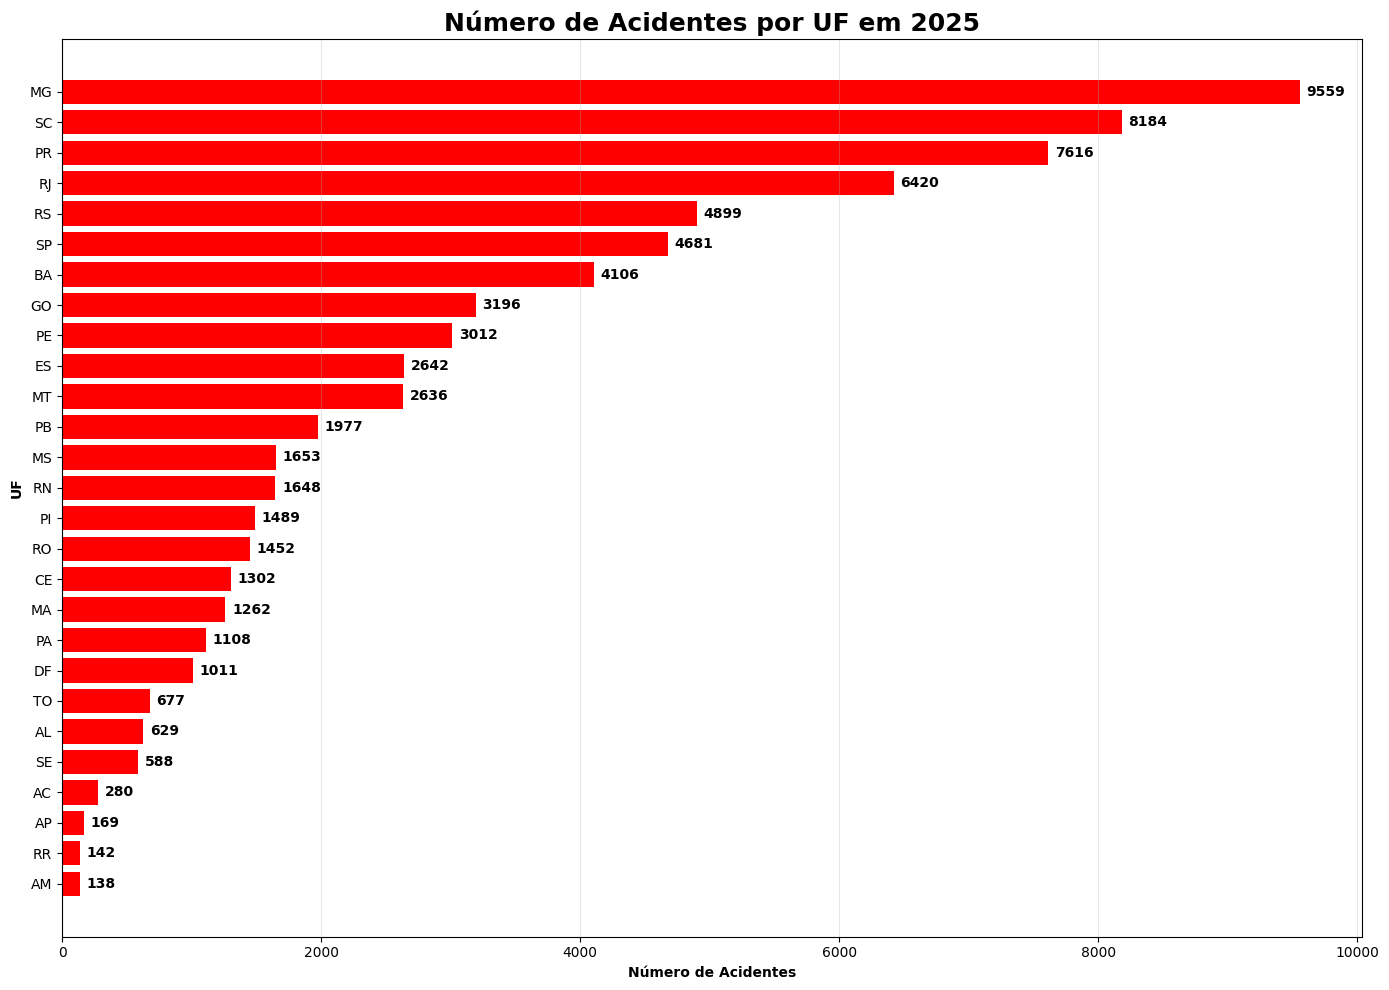

In [ ]:
# Preparando os dados para o gráfico
df_plot = df_uf_ano_sorted.reset_index()
# Ordenando do menor para o maior para que o maior fique no topo do gráfico de barras horizontais
df_plot = df_plot.sort_values(by='2025', ascending=True)

# Criando o gráfico
plt.figure(figsize=(14, 10))
plt.barh(df_plot['uf'], df_plot['2025'], color='red') # Usando uma cor azul padrão

# Colocando os rótulos ao lado das barras
for i, v in enumerate(df_plot['2025']):
    plt.text(
        v + 50,  # Desloca o texto um pouco para a direita da barra
        i,
        f'{v}',
        fontweight='bold',
        ha='left', # Alinha o texto à esquerda
        va='center' # Alinha verticalmente ao centro
    )

plt.title('Número de Acidentes por UF em 2025', fontsize=18, fontweight='bold')
plt.xlabel('Número de Acidentes', fontweight='bold')
plt.ylabel('UF', fontweight='bold')

plt.grid(axis='x', linestyle='-', alpha=0.3)
plt.tight_layout()
plt.show()

**Análise Gráfica por Estado**

O gráfico de barras apresentado reforça visualmente os resultados obtidos anteriormente na tabela de distribuição de acidentes por unidade federativa. Observa-se que os estados de Minas Gerais (MG), Santa Catarina (SC) e Paraná (PR) concentram o maior número de ocorrências em 2025, destacando-se significativamente em relação às demais unidades da federação.

Minas Gerais aparece como o estado com maior volume de acidentes, totalizando 9.559 registros, seguido por Santa Catarina com 8.184 e Paraná com 7.616. Esses estados possuem extensa malha rodoviária federal e intenso fluxo de veículos, fatores que podem contribuir para a maior incidência de ocorrências.

Na outra extremidade, os estados com menor número de acidentes foram Amazonas (AM), Roraima (RR) e Amapá (AP), todos com menos de 200 registros no período analisado. Esse resultado está associado, possivelmente, à menor extensão de rodovias federais e à menor circulação de veículos nessas regiões.

Dessa forma, o gráfico confirma a análise quantitativa realizada anteriormente, evidenciando uma distribuição desigual dos acidentes no território brasileiro, com forte concentração nas regiões Sudeste e Sul.

Insight: A discrepância entre os estados sugere que o número de acidentes está mais relacionado ao volume de tráfego e à infraestrutura rodoviária do que necessariamente a fatores comportamentais isolados.

# **4.2 Visão de Distribuição dos Dados**

Boxplotes:

In [ ]:
def box_plot(dataframe):

    numeric_columns = dataframe.select_dtypes(include=['int64', 'float64']).columns

    print("Colunas numéricas encontradas:")
    print(numeric_columns)

    if len(numeric_columns) == 0:
        print("Nenhuma coluna numérica encontrada!")
        return

    n_cols = 3
    n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
    axes = axes.flatten()

    sns.set_style("whitegrid")

    for i, column in enumerate(numeric_columns):
        print(f"Gerando boxplot para: {column}")
        sns.boxplot(y=dataframe[column], ax=axes[i])
        axes[i].set_title(column)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle("Boxplots das Variáveis Numéricas", fontsize=16)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()



Colunas numéricas encontradas:
Index(['id', 'br', 'km', 'pessoas', 'mortos', 'feridos_leves',
       'feridos_graves', 'ilesos', 'ignorados', 'feridos', 'veiculos',
       'latitude', 'longitude'],
      dtype='object')
Gerando boxplot para: id
Gerando boxplot para: br
Gerando boxplot para: km
Gerando boxplot para: pessoas
Gerando boxplot para: mortos
Gerando boxplot para: feridos_leves
Gerando boxplot para: feridos_graves
Gerando boxplot para: ilesos
Gerando boxplot para: ignorados
Gerando boxplot para: feridos
Gerando boxplot para: veiculos
Gerando boxplot para: latitude
Gerando boxplot para: longitude


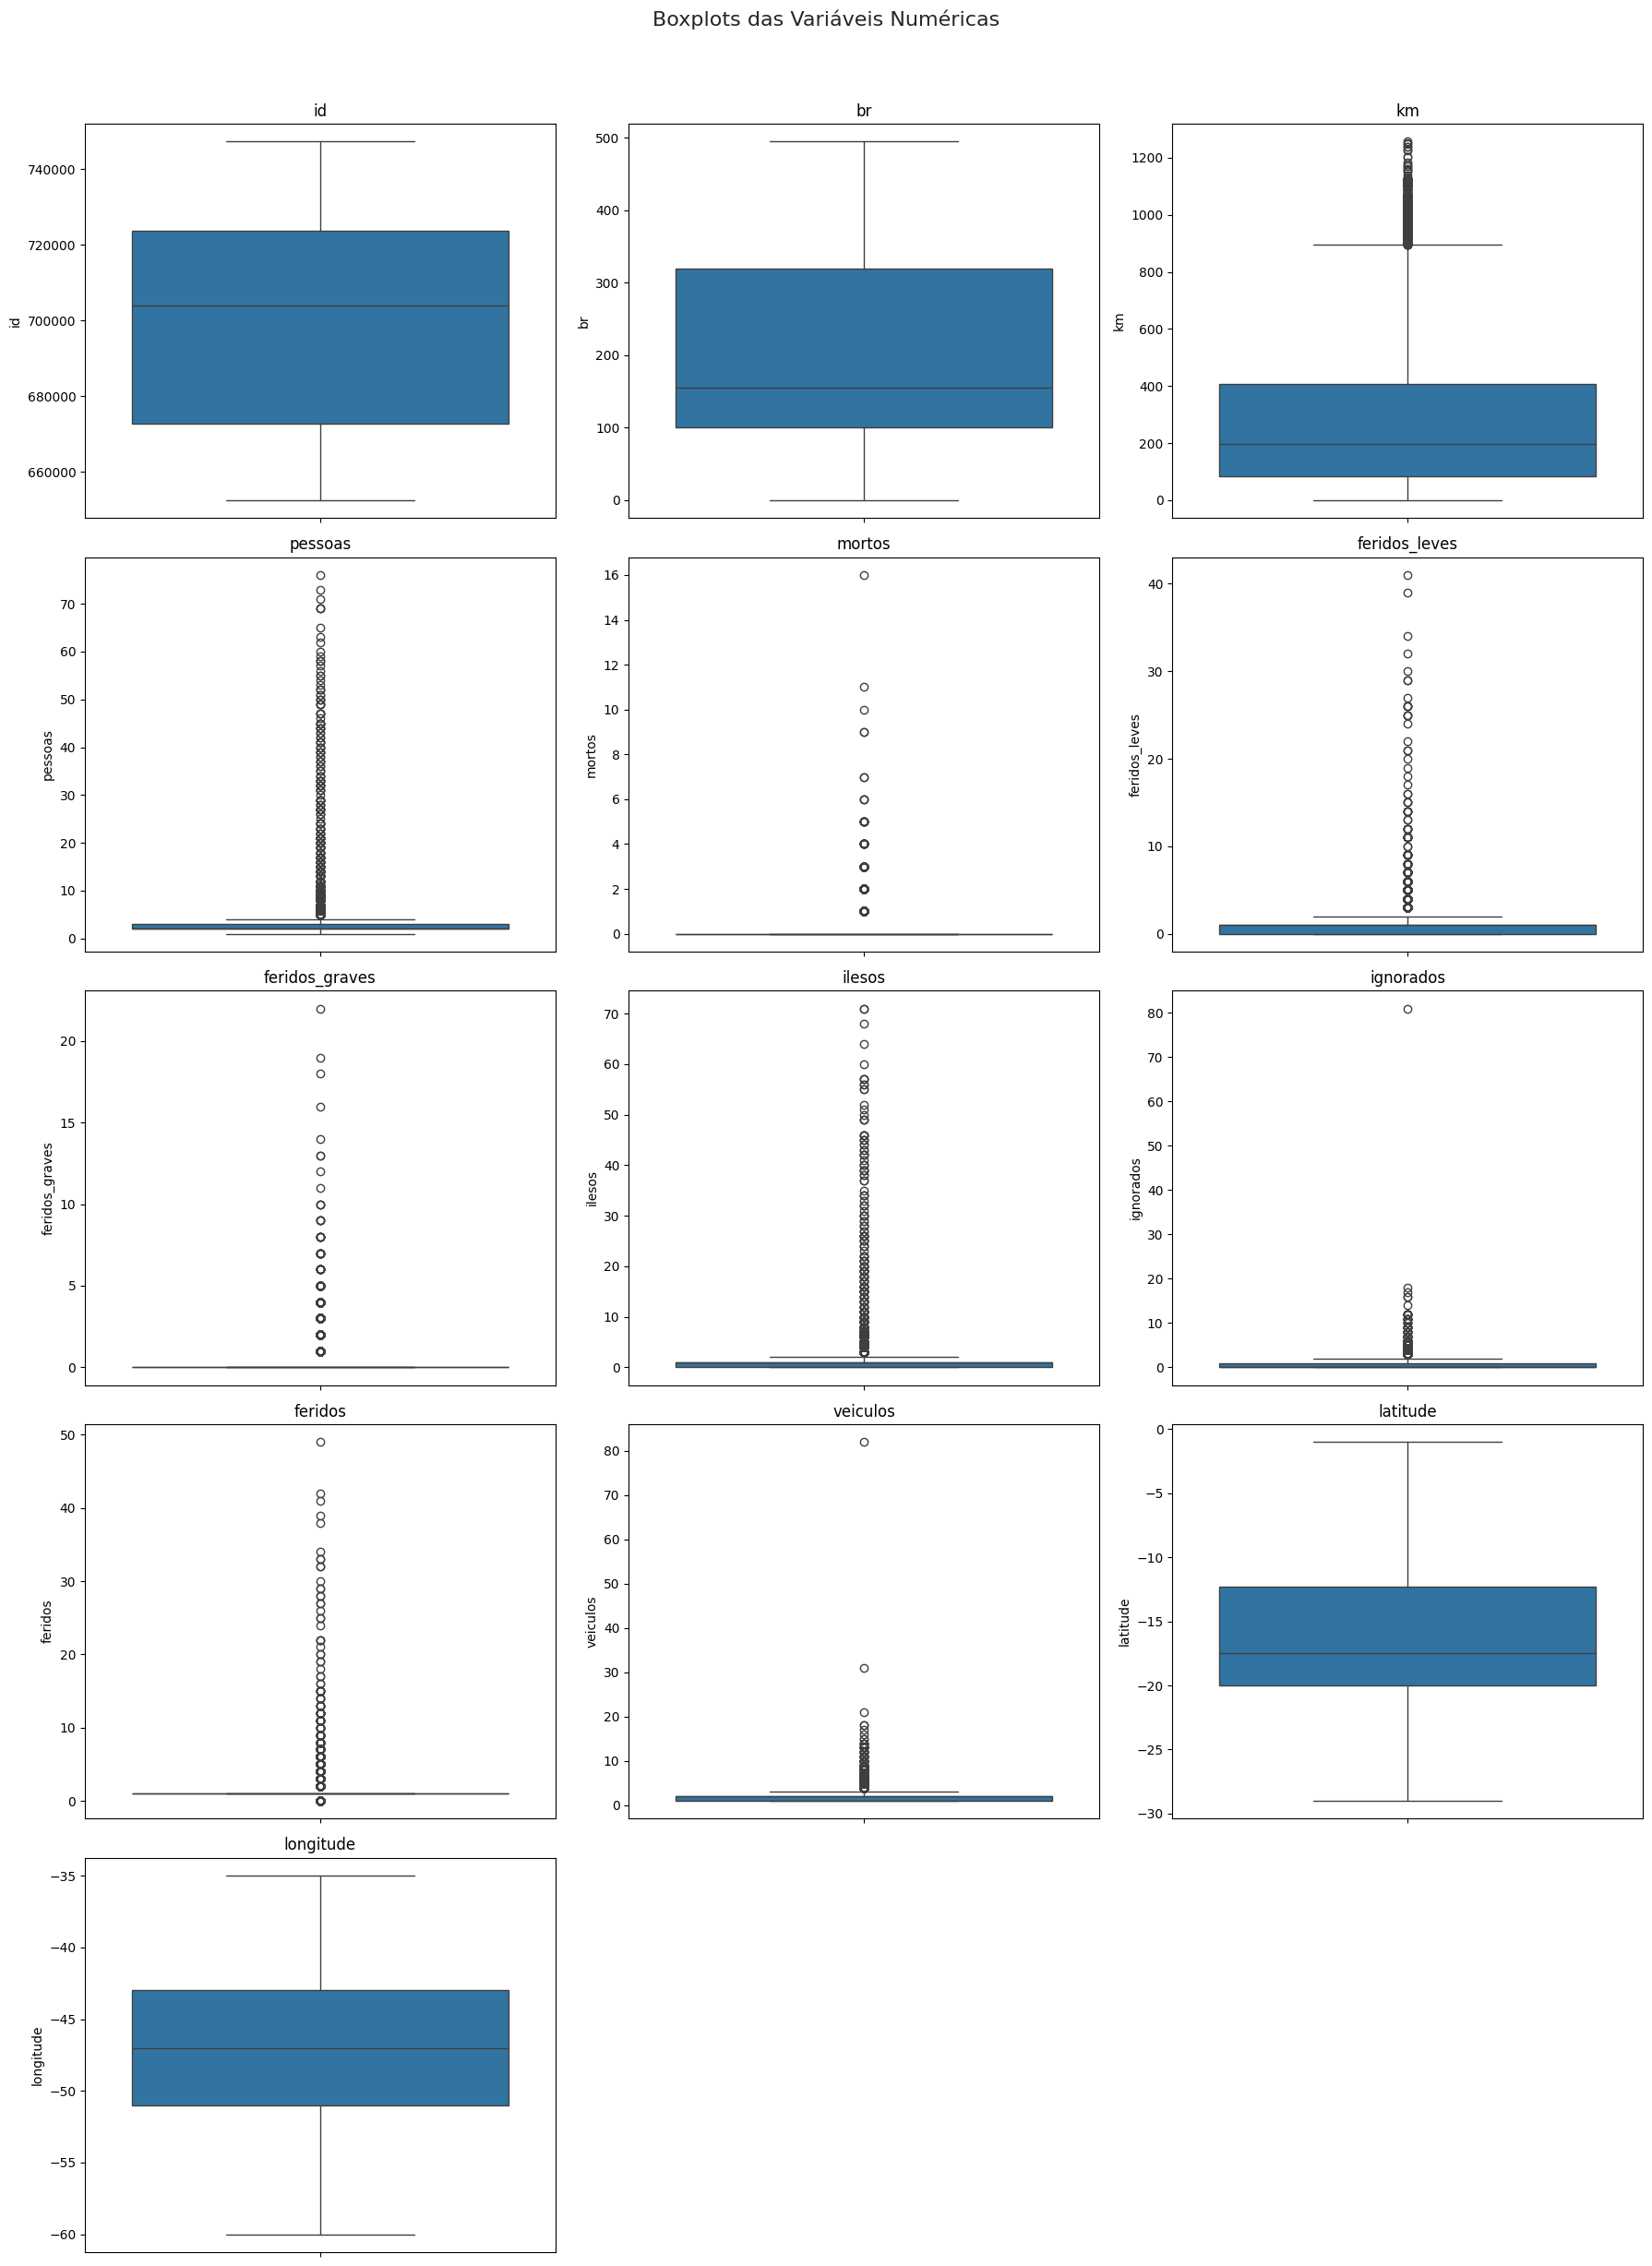

In [ ]:
box_plot(df)


**Análise de Boxplots – Variabilidade e Distribuição dos Acidentes**

A análise dos boxplots das variáveis relacionadas aos acidentes de trânsito revela um padrão consistente de concentração dos dados em valores baixos. Variáveis como pessoas, mortos, feridos leves, feridos graves, ilesos, ignorados e feridos apresentam mediana igual ou muito próxima de zero, indicando que a maior parte dos acidentes registrados não resultou em mortes ou ferimentos graves, além de envolver um número reduzido de pessoas.

O intervalo interquartil (IQR) reduzido na maioria dessas variáveis demonstra que os valores mais frequentes estão próximos entre si, refletindo baixa variabilidade nos registros típicos. Esse comportamento sugere que a maior parte dos acidentes possui características de menor gravidade e menor complexidade.

Entretanto, observa-se a presença recorrente de valores atípicos (outliers) acima dos limites superiores dos boxplots. Esses pontos correspondem a acidentes de maior severidade, nos quais um número elevado de pessoas esteve envolvido ou houve maior quantidade de vítimas. Considerando a natureza dos dados da Polícia Rodoviária Federal, esses valores extremos tendem a representar ocorrências reais, como colisões múltiplas ou acidentes coletivos, e não necessariamente erros de registro.

A assimetria à direita identificada nas distribuições indica que poucos acidentes concentram grande impacto, enquanto a maioria das ocorrências apresenta consequências mais brandas. Esse padrão é característico de bases de dados sobre acidentes de trânsito, nas quais eventos graves são menos frequentes, mas exercem influência significativa sobre as medidas de dispersão.

De forma geral, os boxplots evidenciam que os acidentes registrados em 2025 são predominantemente de baixa gravidade. Contudo, a existência de ocorrências extremas reforça a importância de análises complementares voltadas à identificação de fatores de risco e ao direcionamento de políticas públicas para a prevenção e redução da severidade dos acidentes.

Histogramas:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def histograms(dataframe):
    """
    Plota histogramas com curva KDE para todas as variáveis numéricas do dataframe
    em um painel com 3 gráficos por linha.

    :param dataframe: DataFrame para o qual os histogramas serão gerados.
    """

    # Seleciona apenas colunas numéricas
    numeric_columns = dataframe.select_dtypes(include=['float64', 'int64']).columns

    if len(numeric_columns) == 0:
        print("Nenhuma variável numérica encontrada no dataframe.")
        return

    # Define o número de linhas necessário
    ncols = 3
    nrows = int(np.ceil(len(numeric_columns) / ncols))

    # Cria o painel de gráficos
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 5))

    # Garante que axes seja sempre um array unidimensional
    axes = np.array(axes).reshape(-1)

    # Configura estilo
    sns.set_style("whitegrid")

    # Geração dos histogramas
    for i, column in enumerate(numeric_columns):
        sns.histplot(
            data=dataframe[column],
            ax=axes[i],
            bins=30,
            kde=True
        )

        axes[i].set_title(f'{column}', fontsize=14, fontweight='bold')
        axes[i].set_ylabel('Frequência')
        axes[i].set_xlabel('')
        axes[i].tick_params(axis='both', labelsize=12)

    # Remove eixos vazios caso existam
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Título geral
    fig.suptitle("Análise Descritiva - Histogramas com KDE",
                 fontsize=20, fontweight='bold', y=1.02)

    plt.tight_layout()
    plt.show()


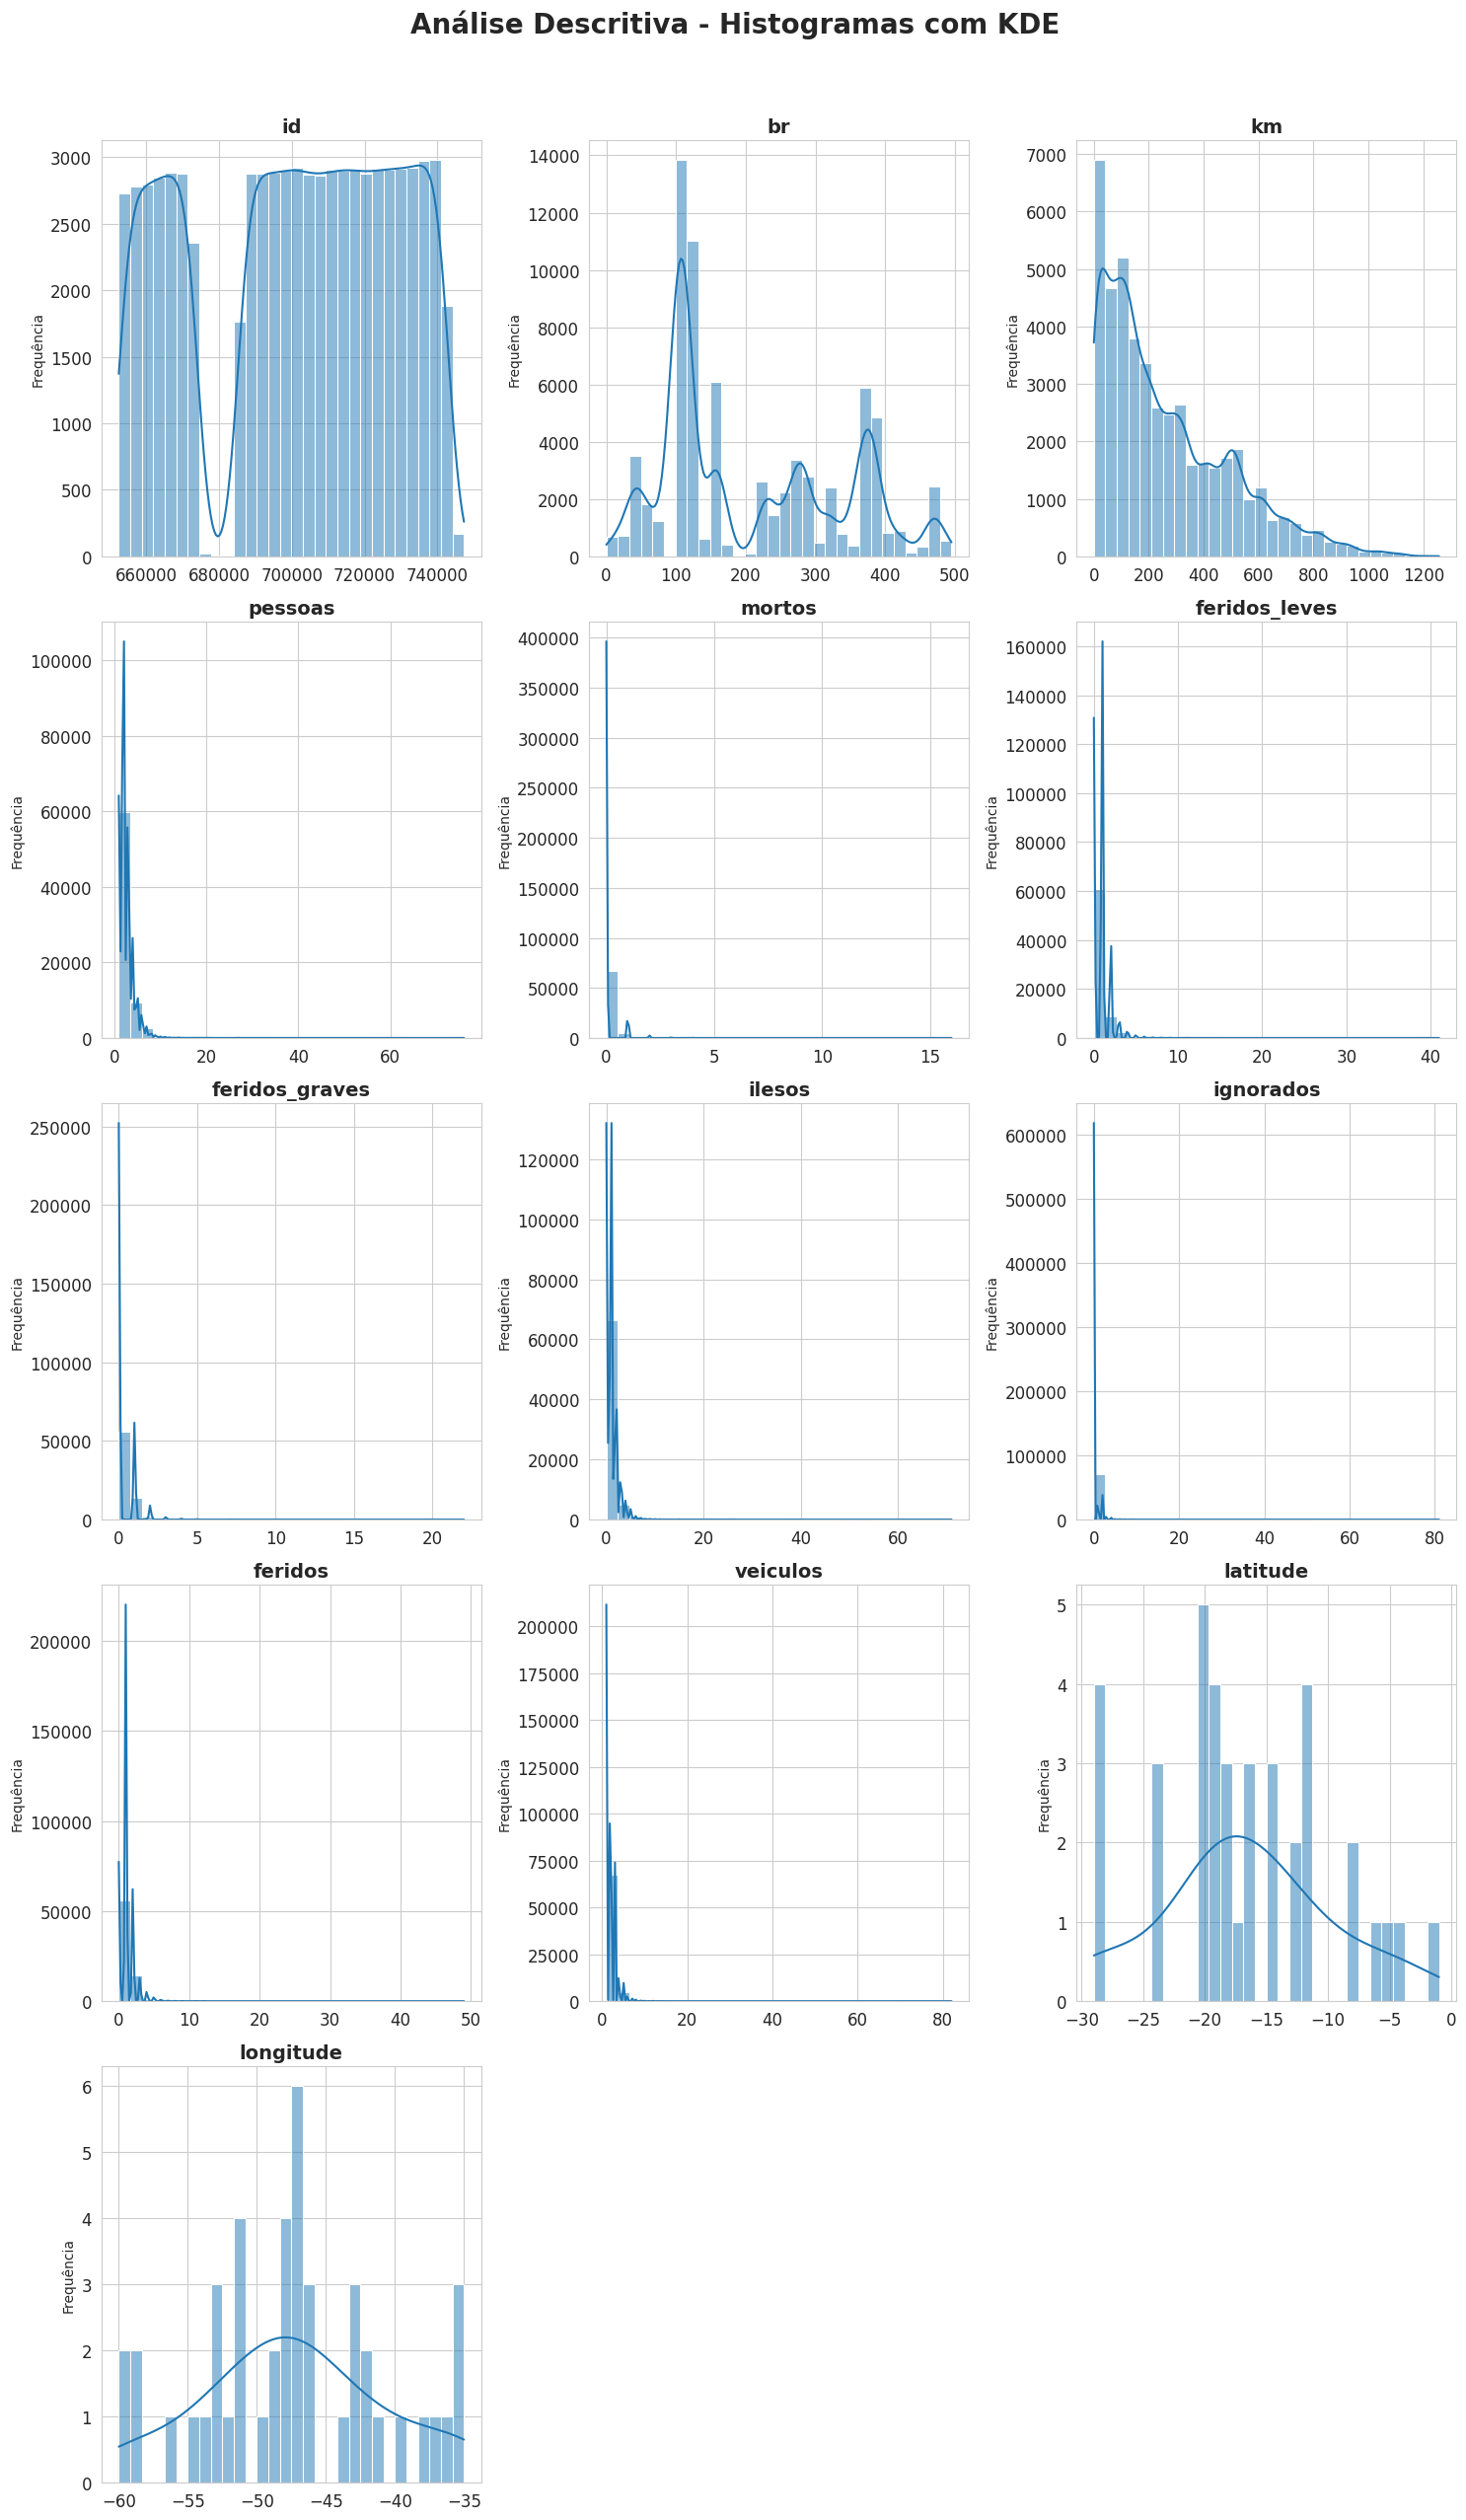

In [ ]:
histograms(df)

**Análise de Histogramas – Variabilidade e Distribuição dos Acidentes**

Observa-se que a maioria das variáveis analisadas apresenta forte concentração de valores próximos a zero. Esse comportamento indica que grande parte dos acidentes registrados envolve poucas pessoas e resulta em baixo número de vítimas.

Variáveis como pessoas, mortos, feridos leves, feridos graves, ilesos, ignorados e total de feridos exibem distribuições assimétricas à direita. Esse padrão revela que, embora existam acidentes com grande número de envolvidos ou com maior gravidade, eles representam exceções dentro do conjunto de dados. A maior frequência está concentrada em ocorrências de menor impacto, nas quais não há óbitos ou há poucos feridos.

Nos histogramas, a presença de “caudas longas” evidencia a existência de eventos extremos, ou seja, acidentes raros porém severos, que aumentam a variabilidade das distribuições. Esse comportamento é característico de dados de trânsito, nos quais poucos eventos críticos coexistem com um grande volume de ocorrências de baixa gravidade.

A variável veículos segue a mesma tendência: a maioria dos acidentes envolve apenas um ou dois veículos, enquanto ocorrências com muitos veículos aparecem com baixa frequência, caracterizando eventos atípicos, como engavetamentos ou colisões de grande porte.

De forma geral, os histogramas confirmam que o cenário dos acidentes de trânsito em 2025 é predominantemente composto por ocorrências de menor severidade, com poucos registros de alto impacto. Essa análise reforça a necessidade de políticas públicas voltadas à prevenção de acidentes cotidianos, sem deixar de considerar estratégias específicas para reduzir os efeitos dos eventos mais graves.

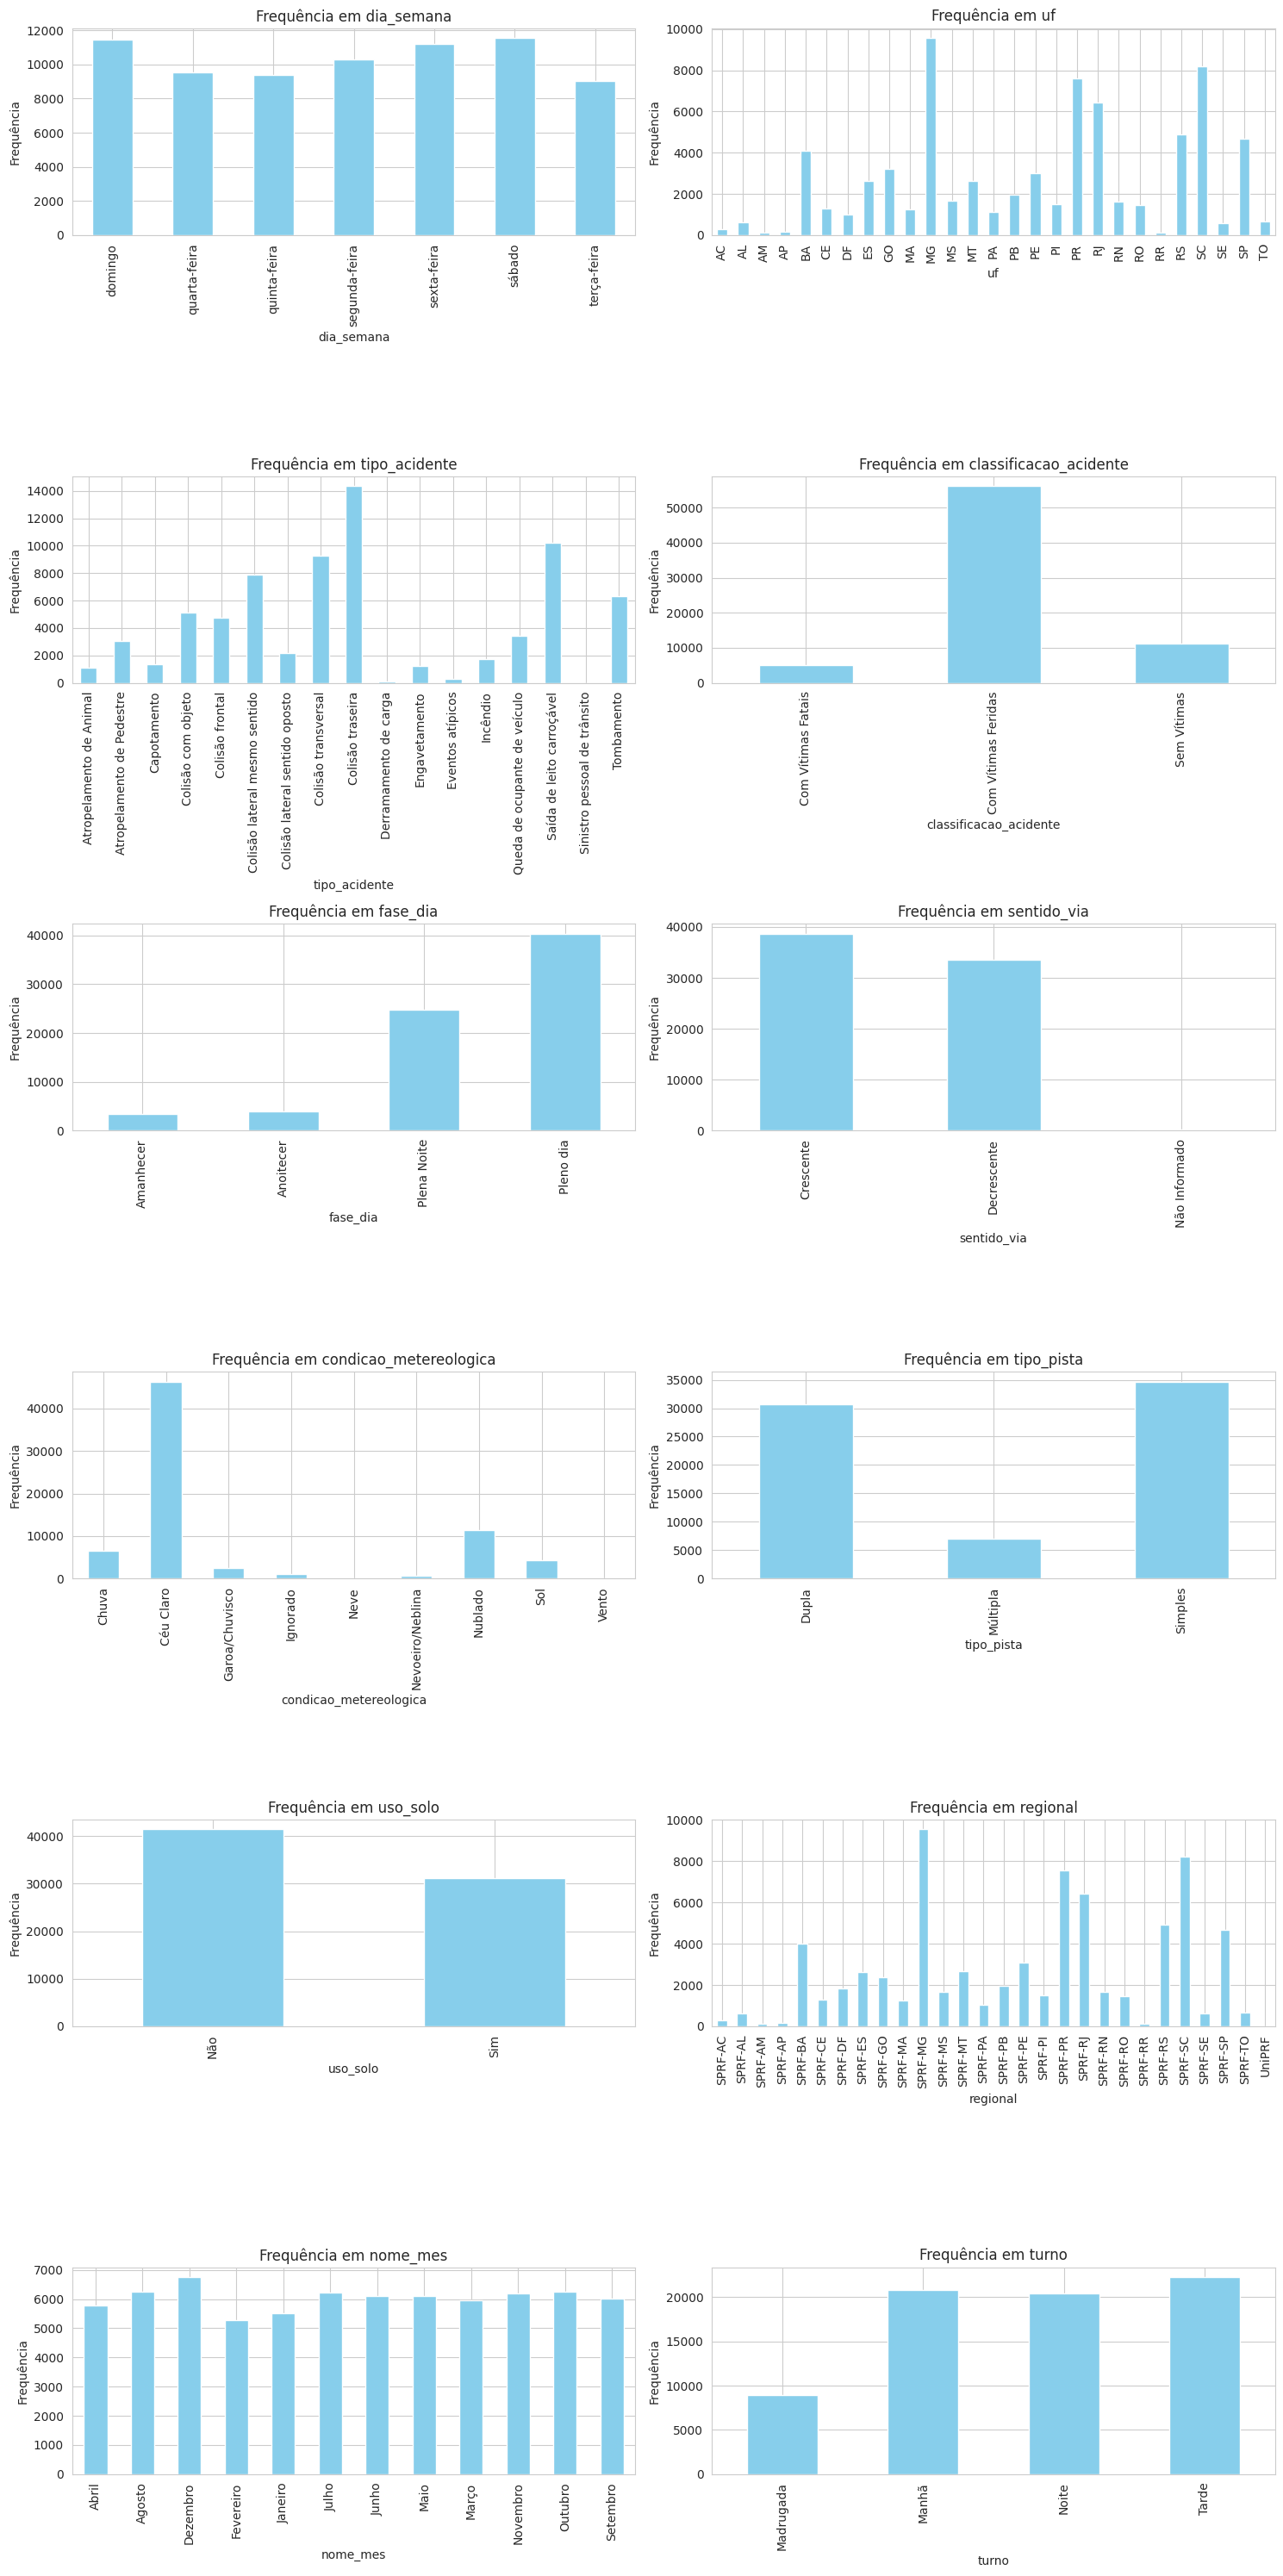

In [ ]:
def plot_categorical_frequency_pt(df, corte_cardinalidade=30, graficos_por_linha=2):
    """
    Plota a frequência de categorias para variáveis categóricas em um DataFrame.

    Parâmetros:
    - df: DataFrame para plotagem.
    - corte_cardinalidade: Cardinalidade máxima para uma coluna ser considerada (padrão é 30).
    - graficos_por_linha: Quantidade de gráficos por linha (padrão é 3).

    Retorna:
    - Exibe os gráficos de barras.
    """

    # Gera metadados para o DataFrame
    metadados = []
    for coluna in df.columns:
        metadados.append({
            'Variável': coluna,
            'Tipo': df[coluna].dtype,
            'Cardinalidade': df[coluna].nunique()
        })

    df_metadados = pd.DataFrame(metadados)

    # Filtra colunas com cardinalidade maior que o corte e tipos não numéricos
    variaveis_categoricas = df_metadados[(df_metadados['Cardinalidade'] <= corte_cardinalidade) & (df_metadados['Tipo'] == 'object')]

    # Calcula o número de linhas e colunas para os subplots
    n_linhas = -(-len(variaveis_categoricas) // graficos_por_linha)  # Ceiling division
    n_colunas = min(len(variaveis_categoricas), graficos_por_linha)

    # Plota as variáveis categóricas
    fig, axs = plt.subplots(nrows=n_linhas, ncols=n_colunas, figsize=(15, 5 * n_linhas))

    for i, (idx, linha) in enumerate(variaveis_categoricas.iterrows()):
        var = linha['Variável']
        ax = axs[i // graficos_por_linha, i % graficos_por_linha]
        df[var].value_counts().sort_index().plot(kind='bar', ax=ax, color='skyblue')
        ax.set_title(f'Frequência em {var}')
        ax.set_ylabel('Frequência')
        ax.set_xlabel(var)

    # Remove os eixos vazios, se houver
    for j in range(i + 1, n_linhas * n_colunas):
        axs[j // graficos_por_linha, j % graficos_por_linha].axis('off')

    plt.tight_layout()
    plt.show()

# Testa a função com os dados e o corte padrão de cardinalidade
plot_categorical_frequency_pt(df, corte_cardinalidade=30, graficos_por_linha=2)

**Análise das Variáveis Categóricas – Padrões e Contexto dos Acidentes**

A análise dos gráficos de frequência das variáveis categóricas permite compreender em quais contextos os acidentes de trânsito nas rodovias federais ocorreram com maior intensidade ao longo de 2025.

Distribuição por dia da semana
Observa-se que os acidentes apresentam variação moderada ao longo da semana, com leve aumento nas sextas-feiras, sábados e domingos. Esse comportamento sugere maior volume de deslocamentos nesses dias, possivelmente associado a viagens de lazer e retorno de fim de semana. Já as terças e quartas-feiras apresentam as menores frequências, indicando um padrão mais estável de tráfego nesses períodos.

Distribuição por estado (UF)
A distribuição por unidade federativa reforça padrões já identificados anteriormente. Minas Gerais, Santa Catarina e Paraná concentram o maior número de ocorrências, enquanto estados da região Norte, como Amazonas, Roraima e Amapá, apresentam os menores volumes. Esse resultado está diretamente relacionado à extensão da malha rodoviária federal e ao fluxo de veículos em cada região, evidenciando que a quantidade de acidentes acompanha a intensidade do tráfego.

Tipos de acidentes
Quanto ao tipo de acidente, nota-se que a colisão traseira é o evento mais frequente, seguida por saída de leito carroçável e colisão lateral no mesmo sentido. Esses tipos de ocorrência estão fortemente ligados a falhas de atenção, excesso de velocidade e desrespeito à distância de segurança.
Em contrapartida, eventos como derramamento de carga, sinistro pessoal de trânsito e eventos atípicos apresentam baixa frequência, indicando que são situações mais raras dentro do conjunto analisado.

Classificação dos acidentes
A variável de classificação dos acidentes mostra que a grande maioria das ocorrências resulta em “acidentes com vítimas feridas”, enquanto os acidentes com vítimas fatais representam uma parcela significativamente menor. Esse padrão está alinhado às análises anteriores de boxplots e histogramas, que já indicavam predominância de eventos de menor gravidade.

Fase do dia
Em relação ao período do dia, verifica-se que a maior parte dos acidentes ocorre em pleno dia, seguida pelo período da noite. Já as fases de amanhecer e anoitecer apresentam menor frequência. Esse comportamento pode estar associado ao maior fluxo de veículos durante o dia, especialmente em horários comerciais, além de melhores condições de visibilidade.

Condições meteorológicas
A análise das condições climáticas revela que a maior parte dos acidentes aconteceu com céu claro, seguido por condições de tempo nublado e, em menor proporção, sob chuva. Ocorrências em situações de vento, neve ou neblina são praticamente inexistentes nos registros.
Esse resultado indica que os acidentes não estão necessariamente associados a condições meteorológicas adversas, mas sim a fatores como comportamento do motorista e volume de tráfego.

Tipo de pista
Quanto à infraestrutura viária, observa-se que a maior parte dos acidentes ocorre em pistas simples, seguidas por pistas duplas. Pistas múltiplas apresentam menor frequência de ocorrências, o que pode indicar que vias com melhor estrutura e separação de fluxos tendem a proporcionar maior segurança.

**4.3 Análise Temporal**

De forma integrada, essas análises mostram que os acidentes em 2025 apresentam padrões claros:

* Maior concentração em finais de semana;

* Predominância em estados com grande fluxo rodoviário;

* Colisões traseiras como principal tipo de ocorrência;

* Baixa proporção de acidentes fatais;

* Maioria ocorrendo em condições climáticas favoráveis e durante o dia;

* Maior incidência em pistas simples.

Esses achados reforçam que os acidentes de trânsito estão muito mais relacionados ao volume de tráfego, ao comportamento dos condutores e às características das vias do que a fatores externos como clima ou horário extremo.

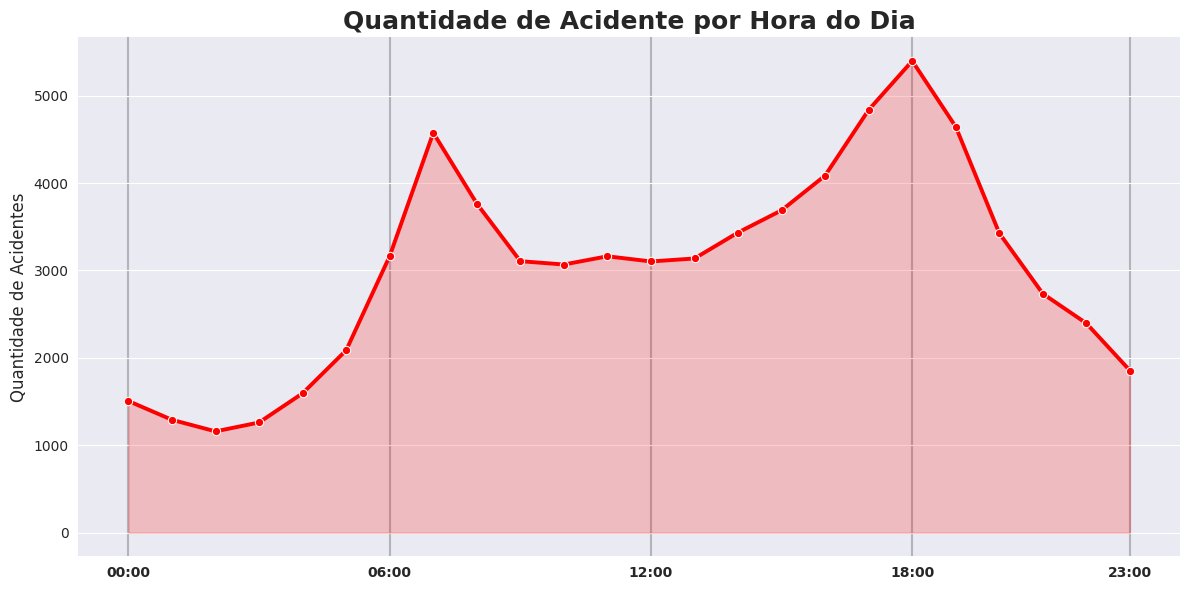

In [ ]:
df_horas = df.copy()
df_horas['hora'] = df_horas['horario'].dt.hour

# Agrupando os acidentes por hora
acidente_por_hora = pd.DataFrame(
    df_horas
    .groupby('hora')
    .size()
    .reset_index(name='quantidade')
)

plt.figure(figsize=(12,6))
sns.set_style('darkgrid')

cor_principal = "red"

# Plotando gráfico de linhas no SEABORN
sns.lineplot(
    data=acidente_por_hora,
    x='hora',
    y='quantidade',
    marker='o',
    color=cor_principal,
    linewidth= 2.8
)

# Preenchendo o gráfico com uma sombra abaixo da linha
plt.fill_between(
    acidente_por_hora['hora'],
    acidente_por_hora['quantidade'],
    color=cor_principal,
    alpha=0.2
)

# Título e Labels
plt.title('Quantidade de Acidente por Hora do Dia', fontsize=18, fontweight='bold')
plt.ylabel('Quantidade de Acidentes', fontsize=12)
plt.xlabel('')

# Ajustando rótulos do eixo x
plt.xticks(
    [0, 6, 12, 18, 23],
    ['00:00', '06:00', '12:00', '18:00', '23:00'],
    fontsize= 10,
    fontweight='bold'
)

plt.grid(axis='x', linestyle='-', alpha=0.5, color='gray', linewidth=1.5) # linhas no eixo x para visualizar melhor: madrugada, manhã, tarde e noite
sns.despine(left=True, bottom=True) # remove as bordas

plt.tight_layout()
plt.show()

4.2.2 Análise de frequência de acidentes por horário x dia da semana

**Análise Temporal – Quantidade de Acidentes por Hora do Dia**

A análise do gráfico de quantidade de acidentes por hora do dia permite compreender com maior precisão como as ocorrências se distribuem ao longo das 24 horas.

Observa se um padrão bem definido de comportamento temporal. Há dois picos claros de acidentes: o primeiro no início da manhã, por volta das 6h às 8h, e o segundo, ainda mais intenso, no final da tarde e início da noite, aproximadamente entre 17h e 19h.

Esses horários coincidem diretamente com os períodos de maior fluxo de veículos nas rodovias, associados ao deslocamento para o trabalho pela manhã e ao retorno para casa no final do dia. Esse comportamento reforça que o volume de tráfego é um dos principais fatores relacionados à ocorrência de acidentes.

Durante a madrugada, entre 0h e 5h, verifica se uma redução significativa na quantidade de registros. Esse resultado é coerente com a menor circulação de veículos nesse período, apesar de a condução noturna apresentar, em geral, maiores riscos individuais.

Ao longo do período da tarde, entre 12h e 16h, os valores permanecem relativamente estáveis, com leve crescimento progressivo até atingir o pico no início da noite.

Dessa forma, o gráfico confirma a análise anterior realizada com a variável fase do dia: embora a maioria dos acidentes ocorra em pleno dia, os momentos mais críticos concentram se exatamente nas transições entre dia e noite, amanhecer e anoitecer, quando há maior movimentação de pessoas e veículos nas rodovias.

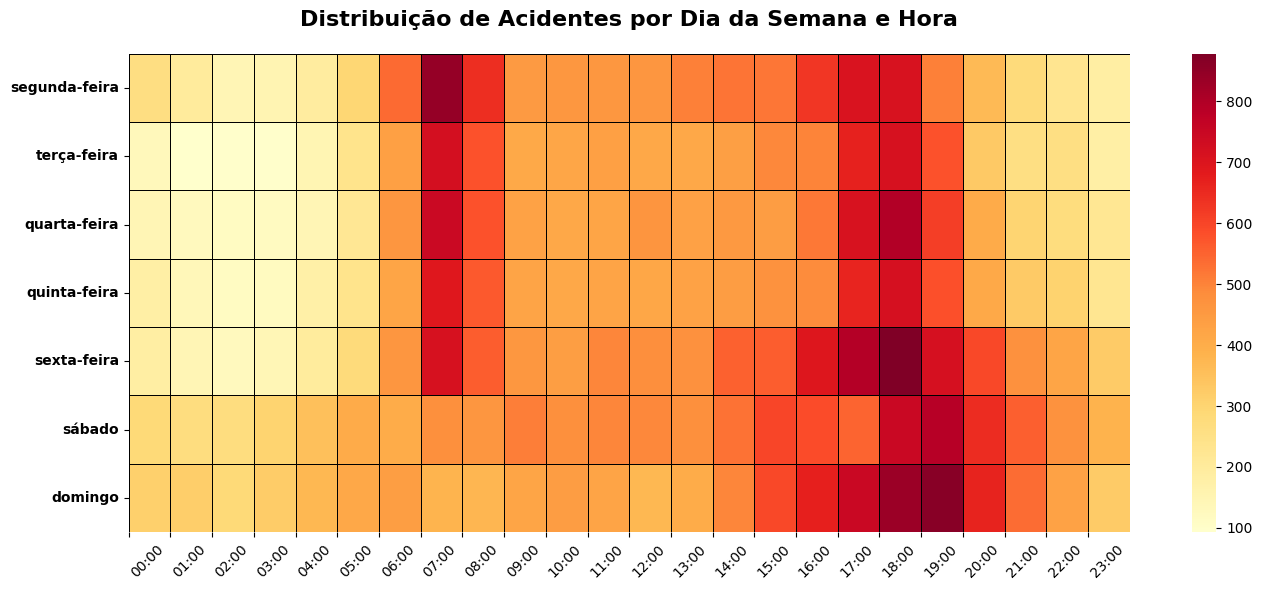

In [ ]:
# Agrupando a quantidade por dias da semana
dias_da_semana = pd.DataFrame(
    df_horas
    .groupby(['dia_semana', 'hora'])
    .size()
    .reset_index(name='quantidade')
)

# Ordenação dos dias da semana. ex: segunda, terça, quarta ...
ordem_dias = [
    'segunda-feira', 'terça-feira', 'quarta-feira', 'quinta-feira', 'sexta-feira', 'sábado', 'domingo'
]

# Ordenando
dias_da_semana['dia_semana'] = pd.Categorical(
    dias_da_semana['dia_semana'],
    categories=ordem_dias,
    ordered=True
)

# Criando uma tabela dinâmica com dias x horas
tabela_calor = dias_da_semana.pivot(index='dia_semana', columns='hora', values='quantidade')

# lista com todos os rótulos das horas para utilizar no xticks
cols = list(tabela_calor.columns)

# Criando a figura
plt.figure(figsize=(14, 6))

# cor do fundo do gráfico
plt.style.use('default')

sns.heatmap(
    tabela_calor,
    cmap='YlOrRd', # tons -> amarelo, laranja e vermelho
    linecolor='black',
    linewidths=0.5, # separação entre os quadros
)

plt.title('Distribuição de Acidentes por Dia da Semana e Hora', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('')
plt.ylabel('')

# Ajustando rótulos dos eixos
plt.yticks(fontweight='bold') # eixo y
plt.xticks(                   # eixo x
    ticks=range(len(cols)),
    labels=[f'{int(h):02d}:00'  for h in cols],
    rotation=45,
    ha='left'
)

plt.tight_layout()
plt.show()


**Análise da Distribuição de Acidentes por Dia da Semana e Hora**

A análise do mapa de calor que cruza os dias da semana com os horários do dia permite uma visão detalhada e integrada do comportamento temporal dos acidentes registrados em 2025.

Observa se que os acidentes não se distribuem de forma uniforme ao longo da semana nem ao longo das horas. Pelo contrário, existe um padrão muito claro de concentração em determinados períodos.

De segunda feira a sexta feira, verifica se um comportamento bastante semelhante: há um primeiro aumento significativo no início da manhã, especialmente entre 6h e 8h, horário típico de deslocamento para o trabalho e para atividades escolares. Esse padrão confirma o impacto do tráfego intenso na elevação do risco de ocorrências.

O período da tarde apresenta volume constante de acidentes, mas o maior pico ocorre no final do dia, entre 17h e 19h. Esse intervalo aparece em tons mais intensos no mapa de calor, indicando que é o momento mais crítico da semana. Trata se do horário de retorno para casa, quando o fluxo de veículos é elevado, há maior cansaço dos condutores e as condições de visibilidade começam a se reduzir.

Nas sextas feiras esse comportamento é ainda mais acentuado. O horário das 18h às 20h apresenta os maiores volumes de toda a semana, sugerindo influência adicional de viagens de fim de semana, deslocamentos recreativos e maior movimento nas rodovias federais.

Já aos sábados e domingos, o padrão muda consideravelmente. Durante a manhã o volume de acidentes é menor que nos dias úteis, mas há crescimento progressivo ao longo do dia, com picos concentrados no período noturno. No domingo, destaca se especialmente o intervalo entre 17h e 20h, possivelmente relacionado ao retorno de viagens e atividades de lazer.

Durante a madrugada, independentemente do dia da semana, observa se menor intensidade de registros. Embora a condução noturna seja mais arriscada, o volume reduzido de veículos contribui para a menor quantidade absoluta de acidentes.

Essa análise evidencia que os acidentes estão fortemente associados aos padrões de mobilidade da população. Os horários de maior risco coincidem com os momentos de maior fluxo nas rodovias, especialmente:

Períodos críticos identificados:

Manhã dos dias úteis: 6h às 8h
Final da tarde e início da noite: 17h às 19h
Sexta feira à noite: maior concentração da semana
Domingo à noite: pico relacionado ao retorno de viagens

**4. Análises comparativas**

In [ ]:
#Tabela cruzada
pd.crosstab(df['tipo_acidente'], df['classificacao_acidente'], normalize='index')


classificacao_acidente,Com Vítimas Fatais,Com Vítimas Feridas,Sem Vítimas
tipo_acidente,,,
Atropelamento de Animal,0.060018,0.787290,0.152692
Atropelamento de Pedestre,0.294830,0.692081,0.013089
Capotamento,0.045952,0.802334,0.151714
Colisão com objeto,0.058190,0.683582,0.258229
Colisão frontal,0.294304,0.643882,0.061814
Colisão lateral mesmo sentido,0.026924,0.838964,0.134112
Colisão lateral sentido oposto,0.098559,0.739656,0.161785
Colisão transversal,0.045821,0.867484,0.086695
Colisão traseira,0.043115,0.805809,0.151076


**Análise Comparativa da Gravidade por Tipo de Acidente**

A partir da tabela cruzada entre tipo de acidente e classificação de gravidade, foi possível avaliar como cada categoria de ocorrência se distribui entre acidentes com vítimas fatais, com vítimas feridas e sem vítimas. Essa análise é fundamental para identificar quais tipos de acidente apresentam maior risco proporcional à vida.

Os resultados evidenciam que os tipos de acidente com maior percentual de fatalidade são:

* Atropelamento de Pedestre (29,48%)

* Colisão Frontal (29,43%)

Esses dois tipos se destacam de forma expressiva em relação aos demais, revelando que, embora não sejam necessariamente os mais frequentes, são os que apresentam maior probabilidade de resultar em mortes. Isso reforça que ocorrências envolvendo pedestres ou impactos frontais diretos são as mais críticas no contexto das rodovias federais.

Outro grupo relevante é formado por:

* Colisão lateral sentido oposto (9,85%)

* Eventos atípicos (8,01%)

Embora com percentuais menores que os dois primeiros, esses tipos também apresentam letalidade considerável, indicando que colisões envolvendo veículos em sentidos contrários tendem a ser mais graves que colisões no mesmo sentido.

Por outro lado, alguns tipos de acidente apresentam baixa ou nenhuma proporção de fatalidades. É o caso de:

* Incêndio (0%)

* Sinistro pessoal de trânsito (0%)

* Queda de ocupante de veículo (2,52%)

Nessas categorias, a grande maioria das ocorrências resulta em vítimas feridas, mas raramente em mortes, o que sugere menor severidade estrutural desses eventos.

Tipos muito comuns, como colisão traseira e colisão transversal, apresentam baixos índices de fatalidade (aproximadamente 4%), porém alto percentual de vítimas feridas. Isso indica que, apesar de menos letais, esses acidentes possuem forte impacto social e sobrecarregam serviços de atendimento e saúde.

Um caso interessante é o de derramamento de carga, em que quase metade das ocorrências (46,72%) é classificada como “sem vítimas”. Esse tipo de sinistro tende a gerar transtornos operacionais e riscos à via, mas com menor impacto direto às pessoas.

De forma geral, a análise permite concluir que:

* A gravidade dos acidentes varia significativamente conforme o tipo de ocorrência

* Os acidentes mais letais são aqueles com impacto direto e alta exposição humana

* A maioria dos tipos de acidente resulta predominantemente em vítimas feridas

* Frequência e gravidade não caminham necessariamente juntas

In [ ]:
pd.crosstab(df['fase_dia'], df['classificacao_acidente'], normalize='index')


classificacao_acidente,Com Vítimas Fatais,Com Vítimas Feridas,Sem Vítimas
fase_dia,,,
Amanhecer,0.112144,0.688263,0.199593
Anoitecer,0.064459,0.791083,0.144459
Plena Noite,0.101748,0.715024,0.183228
Pleno dia,0.050742,0.816985,0.132272


(Descobrir se noite realmente é mais perigosa em termos de RESULTADO, e não só de quantidade)

In [ ]:
#Gravidade por condição meteorológica

gravidade_clima = pd.crosstab(
    df['condicao_metereologica'],
    df['classificacao_acidente'],
    normalize='index'
) * 100

gravidade_clima


classificacao_acidente,Com Vítimas Fatais,Com Vítimas Feridas,Sem Vítimas
condicao_metereologica,,,
Chuva,6.232515,77.416848,16.350637
Céu Claro,7.370488,77.189462,15.440050
Garoa/Chuvisco,5.945500,77.085054,16.969447
Ignorado,10.040568,69.675456,20.283976
Neve,0.000000,100.000000,0.000000
Nevoeiro/Neblina,10.849910,69.981917,19.168174
Nublado,7.262228,78.099571,14.638201
Sol,5.882353,81.900452,12.217195
Vento,8.653846,75.000000,16.346154


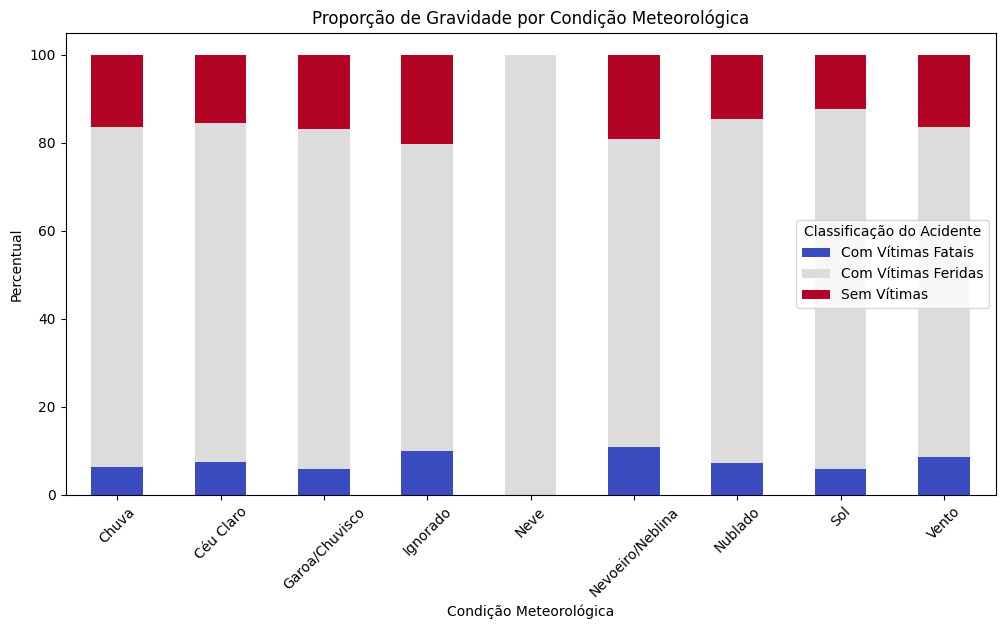

In [ ]:
#visualização em gráfico

gravidade_clima.plot(
    kind='bar',
    stacked=True,
    figsize=(12,6),
    colormap='coolwarm'
)

plt.title('Proporção de Gravidade por Condição Meteorológica')
plt.ylabel('Percentual')
plt.xlabel('Condição Meteorológica')
plt.legend(title='Classificação do Acidente')
plt.xticks(rotation=45)
plt.show()


Ao analisar a proporção da gravidade dos acidentes por condição meteorológica, observa-se que, em todas as condições, a maior parte dos acidentes resulta em vítimas feridas, indicando que a ocorrência de lesões é predominante independentemente do clima. A proporção de acidentes com vítimas fatais apresenta variações entre as categorias, sendo relativamente mais elevada em condições como nevoeiro/neblina, vento e nos registros classificados como “ignorado”.

Nota-se que condições como chuva e céu claro não se destacam como as mais letais, apresentando percentuais de fatalidade semelhantes aos de outras condições meteorológicas. Esse resultado sugere que a presença de chuva, embora possa influenciar a ocorrência de acidentes, não implica necessariamente maior gravidade em termos de óbitos. Por fim, a categoria “neve” deve ser interpretada com cautela, uma vez que o reduzido número de registros pode influenciar a distribuição percentual observada.

In [ ]:
gravidade_clima.sort_values(by='Com Vítimas Fatais', ascending=False)


classificacao_acidente,Com Vítimas Fatais,Com Vítimas Feridas,Sem Vítimas
condicao_metereologica,,,
Nevoeiro/Neblina,10.849910,69.981917,19.168174
Ignorado,10.040568,69.675456,20.283976
Vento,8.653846,75.000000,16.346154
Céu Claro,7.370488,77.189462,15.440050
Nublado,7.262228,78.099571,14.638201
Chuva,6.232515,77.416848,16.350637
Garoa/Chuvisco,5.945500,77.085054,16.969447
Sol,5.882353,81.900452,12.217195
Neve,0.000000,100.000000,0.000000


**Análise Comparativa – Gravidade dos Acidentes por Condição Meteorológica**

A partir da tabela cruzada entre condição meteorológica e classificação do acidente, é possível avaliar como o clima influencia a gravidade das ocorrências registradas nas rodovias federais. Essa análise permite identificar se determinados cenários climáticos estão associados a maior risco de vítimas fatais ou feridas.

De maneira geral, observa-se que, independentemente da condição meteorológica, a maior parte dos acidentes resulta em vítimas feridas, com percentuais próximos de 70% a 82%. No entanto, a proporção de acidentes com vítimas fatais varia de forma relevante conforme o clima no momento da ocorrência.

As condições que apresentaram maior percentual de acidentes fatais foram:

* Nevoeiro/Neblina – 10,84%

* Condição ignorada – 10,04%

* Vento – 8,65%

O destaque para nevoeiro e neblina é especialmente importante, pois indica que a baixa visibilidade representa um fator crítico de risco. Nessas situações, o tempo de reação dos motoristas é reduzido, aumentando a probabilidade de colisões mais graves, como colisões frontais e atropelamentos.

Em contrapartida, condições consideradas mais favoráveis apresentaram percentuais menores de fatalidade:

* Sol – 5,88%

* Garoa/Chuvisco – 5,94%

* Chuva – 6,23%

Esse resultado é bastante interessante, pois contraria uma percepção comum de que a chuva seria o principal fator associado a mortes no trânsito. Apesar de a chuva aumentar a ocorrência de acidentes, os dados indicam que, proporcionalmente, ela não está entre as condições mais letais.

Outro ponto relevante é a condição de céu claro, que apresenta 7,37% de acidentes fatais. Isso sugere que, mesmo em situações de boa visibilidade, o comportamento do motorista e fatores como excesso de velocidade podem ter impacto significativo na gravidade das ocorrências.

A categoria “Neve” aparece com 100% de acidentes com vítimas feridas e nenhum registro fatal. Esse resultado provavelmente está associado ao baixíssimo número de ocorrências desse tipo no Brasil, o que torna essa linha pouco representativa estatisticamente.

De forma complementar, percebe-se que as condições com maior percentual de acidentes sem vítimas são:

* Ignorado – 20,28%

* Nevoeiro/Neblina – 19,16%

Isso indica que, embora neblina e condições não registradas estejam associadas a maior letalidade, também apresentam muitos casos de menor gravidade, possivelmente por envolverem situações de baixa velocidade.

4.1 Análises numéricas segmentadas por gravidade

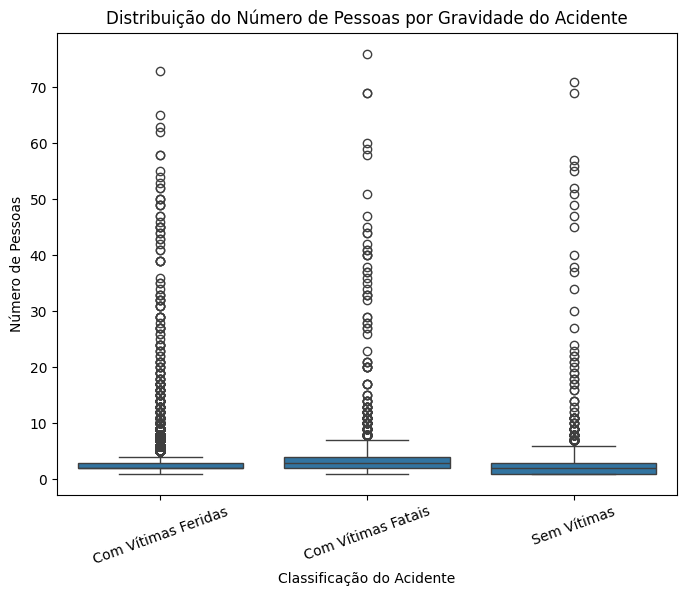

In [ ]:
#Pessoas envolvidas x Gravidade

plt.figure(figsize=(8,6))
sns.boxplot(
    x='classificacao_acidente',
    y='pessoas',
    data=df
)

plt.title('Distribuição do Número de Pessoas por Gravidade do Acidente')
plt.xlabel('Classificação do Acidente')
plt.ylabel('Número de Pessoas')
plt.xticks(rotation=20)
plt.show()


A distribuição do número de pessoas envolvidas por classificação do acidente indica que a mediana é semelhante entre os três grupos, concentrando-se em valores baixos, o que sugere que a maioria dos acidentes envolve poucas pessoas, independentemente da gravidade. Observa-se, entretanto, que os acidentes com vítimas fatais apresentam maior dispersão dos dados, com valores máximos mais elevados quando comparados às demais categorias.

A presença de diversos valores extremos em todas as classificações evidencia a ocorrência de acidentes com grande número de pessoas envolvidas, embora esses casos sejam pouco frequentes. Destaca-se que, nos acidentes com vítimas fatais, esses outliers são mais expressivos, indicando que eventos de maior complexidade e envolvendo mais pessoas tendem a estar associados a maior severidade.

De modo geral, os resultados reforçam que o número de pessoas envolvidas, isoladamente, não determina a gravidade do acidente, mas acidentes mais graves tendem a apresentar maior variabilidade nesse indicador.

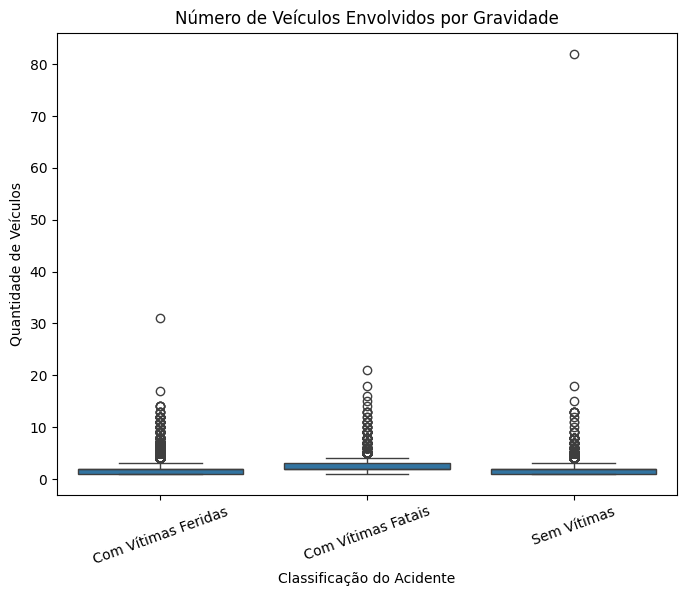

In [ ]:
#Veículos envolvidos x Gravidade
plt.figure(figsize=(8,6))
sns.boxplot(
    x='classificacao_acidente',
    y='veiculos',
    data=df
)

plt.title('Número de Veículos Envolvidos por Gravidade')
plt.xlabel('Classificação do Acidente')
plt.ylabel('Quantidade de Veículos')
plt.xticks(rotation=20)
plt.show()


A análise da distribuição do número de veículos envolvidos por classificação do acidente indica que a mediana permanece baixa e semelhante entre as categorias, sugerindo que a maioria dos acidentes envolve poucos veículos, independentemente da gravidade. Observa-se, entretanto, que os acidentes com vítimas fatais apresentam maior dispersão, com valores máximos mais elevados em comparação aos acidentes com vítimas feridas e sem vítimas.

A presença de valores extremos em todas as classificações evidencia a ocorrência de acidentes com múltiplos veículos, embora esses eventos sejam pouco frequentes. Destaca-se que, mesmo em acidentes classificados como “sem vítimas”, existem registros com grande número de veículos envolvidos, o que indica que a gravidade do acidente não está exclusivamente associada à quantidade de veículos, mas a outros fatores como tipo de colisão, dinâmica do impacto e condições da via.

De forma geral, os resultados reforçam que o número de veículos envolvidos, isoladamente, não é um determinante direto da gravidade, embora acidentes mais severos apresentem maior variabilidade nesse indicador.

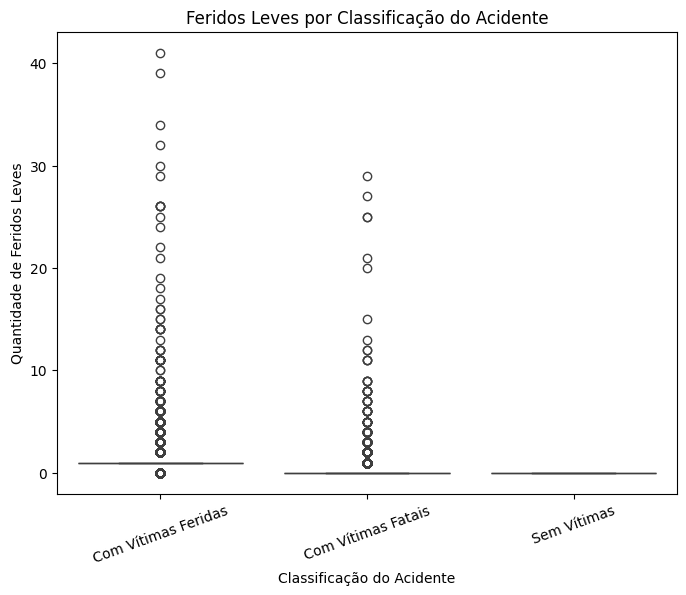

In [ ]:
#Feridos leves x Gravidade
plt.figure(figsize=(8,6))
sns.boxplot(
    x='classificacao_acidente',
    y='feridos_leves',
    data=df
)

plt.title('Feridos Leves por Classificação do Acidente')
plt.xlabel('Classificação do Acidente')
plt.ylabel('Quantidade de Feridos Leves')
plt.xticks(rotation=20)
plt.show()


A distribuição da quantidade de feridos leves por classificação do acidente evidencia que a mediana é baixa em todas as categorias, indicando que a maioria dos acidentes resulta em poucos ou nenhum ferido leve. Observa-se que os acidentes classificados como “com vítimas feridas” apresentam maior dispersão e valores máximos mais elevados, o que era esperado, uma vez que essa categoria inclui diretamente a ocorrência de lesões não fatais.

Nos acidentes com vítimas fatais, embora a mediana permaneça baixa, verifica-se a presença de valores extremos, indicando que esses eventos podem envolver simultaneamente óbitos e um número significativo de feridos leves. Por outro lado, nos acidentes sem vítimas, a distribuição concentra-se próxima de zero, com baixa variabilidade, reforçando a coerência da classificação adotada.

De forma geral, os resultados indicam que a quantidade de feridos leves está fortemente associada à classificação do acidente, porém sua presença não exclui a ocorrência de eventos mais graves, nos quais coexistem diferentes níveis de severidade das lesões.

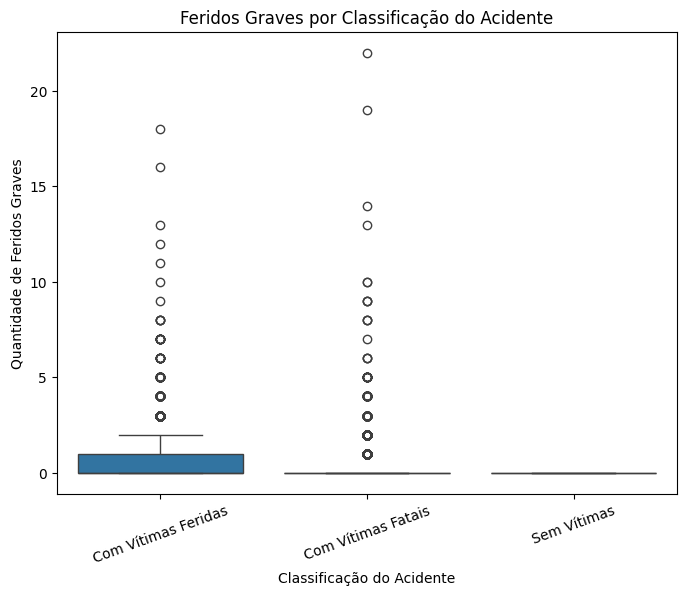

In [ ]:
#Feridos graves x Gravidade

plt.figure(figsize=(8,6))
sns.boxplot(
    x='classificacao_acidente',
    y='feridos_graves',
    data=df
)

plt.title('Feridos Graves por Classificação do Acidente')
plt.xlabel('Classificação do Acidente')
plt.ylabel('Quantidade de Feridos Graves')
plt.xticks(rotation=20)
plt.show()


A distribuição da quantidade de feridos graves por classificação do acidente indica que a mediana é próxima de zero em todas as categorias, evidenciando que a maioria dos acidentes não resulta em ferimentos graves. No entanto, observa-se que os acidentes com vítimas fatais apresentam maior dispersão e valores máximos mais elevados, indicando a ocorrência de eventos de elevada severidade, nos quais coexistem óbitos e ferimentos graves.

Nos acidentes classificados como “com vítimas feridas”, embora a maioria dos casos apresente poucos feridos graves, há a presença de valores extremos, sugerindo que parte desses eventos envolve lesões de maior gravidade. Por outro lado, nos acidentes sem vítimas, a distribuição concentra-se integralmente em zero, o que reforça a consistência da classificação adotada.

De forma geral, os resultados indicam que a ocorrência de feridos graves está fortemente associada à gravidade do acidente, porém tais eventos são pouco frequentes quando comparados ao volume total de acidentes registrados.

In [ ]:
pd.crosstab(df['uf'], df['classificacao_acidente'], normalize='index')


classificacao_acidente,Com Vítimas Fatais,Com Vítimas Feridas,Sem Vítimas
uf,,,
AC,0.103571,0.757143,0.139286
AL,0.136725,0.710652,0.152623
AM,0.137681,0.565217,0.297101
AP,0.053254,0.822485,0.124260
BA,0.115928,0.737214,0.146858
CE,0.116833,0.730208,0.152959
DF,0.042532,0.766568,0.190900
ES,0.054883,0.860333,0.084784
GO,0.077284,0.724343,0.198373


**Análise da Gravidade dos Acidentes por Estado**

A análise da relação entre a classificação dos acidentes e os estados brasileiros permitiu avaliar o nível de gravidade proporcional das ocorrências registradas nas rodovias federais em 2025.

Os resultados mostram que a severidade dos acidentes varia significativamente entre as regiões do país. Estados como Maranhão (18,7%), Pará (17,4%), Roraima (16,2%) e Amazonas (13,8%) apresentaram as maiores proporções de acidentes com vítimas fatais, indicando maior letalidade relativa.

Em contraste, unidades federativas com grande volume de ocorrências, como São Paulo (4,4%), Santa Catarina (4,6%), Distrito Federal (4,3%) e Rio de Janeiro (4,7%), registraram percentuais bem menores de fatalidades, sugerindo melhores condições de infraestrutura, atendimento e segurança viária.

Esse resultado evidencia que maior quantidade de acidentes não significa necessariamente maior gravidade. Estados com menos ocorrências totais podem apresentar maior risco proporcional de mortes.

Insight: políticas públicas e ações preventivas devem priorizar não apenas regiões com maior número de acidentes, mas principalmente aquelas com maior índice de letalidade.

In [ ]:
df.groupby('classificacao_acidente')[['pessoas', 'veiculos', 'feridos_leves', 'feridos_graves', 'mortos']].mean()


,pessoas,veiculos,feridos_leves,feridos_graves,mortos
classificacao_acidente,,,,,
Com Vítimas Fatais,3.459470,2.506147,0.393776,0.346523,1.160008
Com Vítimas Feridas,2.590175,1.972801,1.094334,0.324148,0.000000
Sem Vítimas,2.224748,1.888569,0.000000,0.000000,0.000000


A média das variáveis numéricas por classificação do acidente evidencia um gradiente claro de gravidade entre as categorias. Os acidentes com vítimas fatais apresentam, em média, maior número de pessoas (≈ 3,46) e veículos (≈ 2,51) envolvidos, além de valores médios positivos de feridos graves e óbitos, caracterizando ocorrências mais complexas e severas.

Nos acidentes com vítimas feridas, observa-se uma redução no número médio de pessoas e veículos em relação aos acidentes fatais, com destaque para a maior média de feridos leves (≈ 1,09) e ausência de óbitos, o que reforça a distinção dessa categoria quanto à natureza das lesões.

Já nos acidentes sem vítimas, as médias de pessoas e veículos são as mais baixas entre as classificações e não há registro médio de feridos ou mortos, indicando eventos de menor impacto humano. De forma geral, os resultados corroboram as análises gráficas anteriores, sugerindo que o aumento da gravidade do acidente está associado ao maior envolvimento de pessoas e veículos e à intensificação das consequências sobre as vítimas.

4.3 Correlação geral


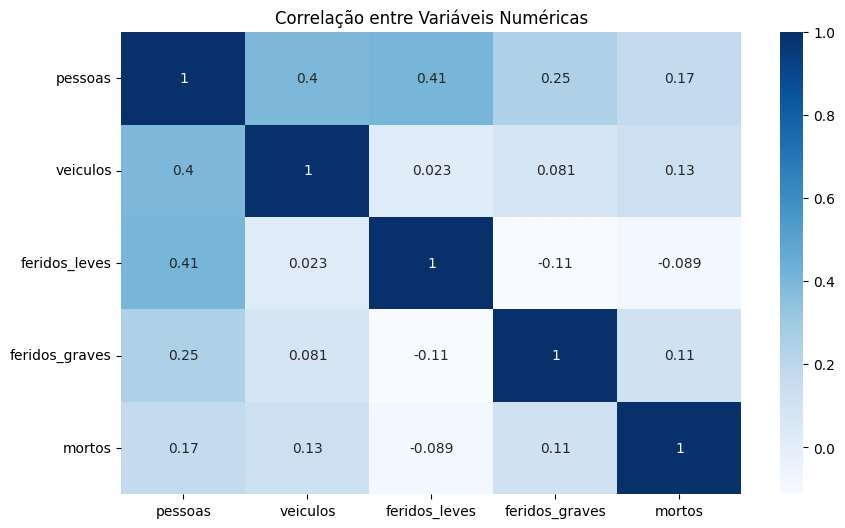

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(
    df[['pessoas','veiculos','feridos_leves','feridos_graves','mortos']].corr(),
    annot=True,
    cmap='Blues'
)

plt.title('Correlação entre Variáveis Numéricas')
plt.show()


A matriz de correlação entre as variáveis numéricas indica, de modo geral, associações fracas a moderadas entre os indicadores analisados. Observa-se uma correlação moderada positiva entre o número de pessoas envolvidas e o número de veículos (≈ 0,40), o que era esperado, uma vez que acidentes com mais veículos tendem a envolver mais pessoas.

Nota-se também uma correlação moderada entre o número de pessoas e a quantidade de feridos leves (≈ 0,41), indicando que o aumento de pessoas envolvidas está associado a maior ocorrência de lesões leves. Em contrapartida, as correlações entre feridos leves e feridos graves, bem como entre feridos leves e mortos, são fracas ou levemente negativas, sugerindo que a presença de ferimentos leves não está diretamente relacionada ao aumento de casos graves ou fatais.

A variável mortos apresenta correlações fracas com as demais variáveis, o que indica que os óbitos não dependem diretamente do volume de pessoas ou veículos envolvidos, mas possivelmente de outros fatores não contemplados nesta análise, como tipo de colisão, velocidade, uso de dispositivos de segurança ou condições da via.

**Conclusão Geral**

A partir da análise exploratória dos dados da Polícia Rodoviária Federal referentes ao ano de 2025, foi possível identificar padrões claros na distribuição dos acidentes graves e fatais nas rodovias federais brasileiras.

Do ponto de vista geográfico, observou-se forte concentração de ocorrências nos estados das regiões Sudeste e Sul, com destaque para Minas Gerais, Santa Catarina e Paraná. Essa concentração está associada, principalmente, à maior extensão da malha rodoviária federal e ao elevado volume de tráfego nessas regiões.

Em relação aos períodos do tempo, os acidentes graves e fatais apresentam maior incidência nos finais de semana, especialmente aos sábados e domingos, bem como em horários de pico de circulação. Os períodos mais críticos concentram-se no início da manhã (entre 6h e 8h) e, principalmente, no final da tarde e início da noite (entre 17h e 19h), coincidindo com os horários de deslocamento para o trabalho e retorno para casa.

A análise temporal detalhada também evidenciou que sextas-feiras à noite e domingos no período noturno apresentam padrões de risco elevados, possivelmente associados a viagens de lazer e retorno de deslocamentos de fim de semana.

Embora a maioria dos acidentes registrados apresente baixa gravidade, envolvendo poucos veículos e poucas pessoas, os acidentes graves e fatais concentram-se em uma parcela reduzida de ocorrências, caracterizadas por tipos específicos de acidente, como colisões frontais e atropelamentos de pedestres, além de condições de visibilidade reduzida, como nevoeiro e neblina.

Dessa forma, conclui-se que os acidentes mais graves e fatais em 2025 estão fortemente relacionados ao volume de tráfego, aos padrões de mobilidade da população e a fatores comportamentais dos condutores, mais do que a condições meteorológicas adversas isoladas. Esses resultados reforçam a importância de políticas públicas focadas na fiscalização em períodos críticos, na educação para o trânsito e na prevenção de comportamentos de risco.

**Conclusão Geral – Resposta à Pergunta do Projeto**

A partir da Análise Exploratória dos Dados da Polícia Rodoviária Federal referentes ao ano de 2025, foi possível responder à pergunta central deste estudo: onde, quando e em quais condições ocorrem os acidentes mais graves e fatais nas rodovias federais brasileiras.

Do ponto de vista geográfico, verificou-se forte concentração do número absoluto de acidentes nas regiões Sudeste e Sul, com destaque para os estados de Minas Gerais, Santa Catarina e Paraná. Essa concentração está diretamente associada à maior extensão da malha rodoviária federal e ao elevado volume de tráfego nessas localidades.

Entretanto, ao analisar a gravidade proporcional por estado, observou-se que regiões com menor quantidade total de acidentes especialmente no Norte e Nordeste, apresentam maiores percentuais de acidentes fatais, indicando que a letalidade não está necessariamente ligada ao volume de ocorrências, mas a fatores como infraestrutura, fiscalização e características das vias.

Na dimensão temporal, identificou-se que os acidentes graves e fatais ocorrem com maior frequência nos finais de semana, principalmente aos sábados e domingos. Além disso, os horários mais críticos concentram-se no início da manhã (entre 6h e 8h) e no final da tarde e início da noite (entre 17h e 19h), períodos associados ao deslocamento para trabalho e retorno para casa.

Também foi constatado que sextas-feiras à noite e domingos no período noturno apresentam padrões de risco elevados, possivelmente relacionados a viagens de lazer e retorno de deslocamentos de fim de semana.

Embora a maioria dos acidentes registrados seja de baixa gravidade, envolvendo poucos veículos e poucas pessoas, os acidentes graves e fatais concentram-se em uma pequena parcela das ocorrências. Esses eventos estão fortemente associados a tipos específicos de acidente, como colisões frontais e atropelamentos de pedestres, além de situações de visibilidade reduzida, como nevoeiro e neblina.

Portanto, conclui-se que os acidentes mais graves e fatais em 2025 estão relacionados principalmente a:

* volume e fluxo de tráfego,

* períodos críticos de deslocamento,

* padrões comportamentais dos condutores,

* e características específicas das vias e regiões.

Esses resultados reforçam a importância de ações estratégicas voltadas para:

* maior fiscalização em horários e locais críticos,

* campanhas educativas de prevenção,

* e políticas públicas focadas na redução de comportamentos de risco no trânsito.

Dessa forma, a análise realizada permite compreender com clareza o perfil dos acidentes graves e fatais no Brasil em 2025, fornecendo informações relevantes para apoiar decisões voltadas à segurança viária e à redução de vítimas no trânsito.